In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
folder_path = '/content/drive/MyDrive/Electricity-Power'
os.chdir(folder_path)


Mounted at /content/drive


In [ ]:
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import gc

In [ ]:
path = 'delimiter/'
i=0
datasets = {}
duplicates ={}
for full_name in os.listdir(path):
    name = full_name.split(".")[0]
    df = pd.read_csv(path+full_name)
    datasets.update({name: df.columns})
    print(i+1 ,'- ', full_name)
    i+=1
    dup = df[df['End date'].duplicated(keep=False)]['End date']
    duplicates.update({name: dup})
# datasets


1 -  Actual_generation_202301010000_202503050000_Quarterhour.csv
2 -  Forecasted_generation_Day-Ahead_202301010000_202503050000_Hour_Quarterhour.csv
3 -  Generation_Forecast_Intraday_202301010000_202503050000_Quarterhour.csv
4 -  Installed_generation_capacity_202301010000_202503050000_Year.csv
5 -  Actual_consumption_202301010000_202503050000_Quarterhour.csv
6 -  Forecasted_consumption_202301010000_202503050000_Quarterhour.csv
7 -  Day-ahead_prices_202301010000_202503050000_Hour.csv
8 -  Scheduled_commercial_exchanges_202301010000_202503050000_Quarterhour.csv
9 -  Cross-border_physical_flows_202301010000_202503050000_Quarterhour.csv
10 -  Balancing_energy_202301010000_202503050000_Quarterhour_Month.csv
11 -  Costs_of_TSOs__without_costs_of_DSOs__202301010000_202503050000_Month.csv
12 -  Frequency_Containment_Reserve_202301010000_202503050000_Quarterhour.csv
13 -  Automatic_Frequency_Restoration_Reserve_202301010000_202503050000_Quarterhour.csv
14 -  Manual_Frequency_Restoration_Reserve

In [ ]:
duplicates

{'Actual_generation_202301010000_202503050000_Quarterhour': 7975     2023-03-25 02:00:00
 8071     2023-03-25 02:00:00
 28900    2023-10-29 02:15:00
 28901    2023-10-29 02:30:00
 28902    2023-10-29 02:45:00
 28903    2023-10-29 03:00:00
 28904    2023-10-29 02:15:00
 28905    2023-10-29 02:30:00
 28906    2023-10-29 02:45:00
 28907    2023-10-29 03:00:00
 43591    2024-03-30 02:00:00
 43687    2024-03-30 02:00:00
 63844    2024-10-27 02:15:00
 63845    2024-10-27 02:30:00
 63846    2024-10-27 02:45:00
 63847    2024-10-27 03:00:00
 63848    2024-10-27 02:15:00
 63849    2024-10-27 02:30:00
 63850    2024-10-27 02:45:00
 63851    2024-10-27 03:00:00
 Name: End date, dtype: object,
 'Forecasted_generation_Day-Ahead_202301010000_202503050000_Hour_Quarterhour': 7975     2023-03-25 02:00:00
 8071     2023-03-25 02:00:00
 28900    2023-10-29 02:15:00
 28901    2023-10-29 02:30:00
 28902    2023-10-29 02:45:00
 28903    2023-10-29 03:00:00
 28904    2023-10-29 02:15:00
 28905    2023-10-29 

In [ ]:
import csv

def write_to_csv(datasets, filename):
    with open(filename, mode='w', newline='') as csvfile:
        fieldnames = ['Dataset', 'Feature']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()

        for dataset, features in datasets.items():
            for feature in features:
                writer.writerow({'Dataset': dataset, 'Feature': feature})

# Specify the output CSV filename
filename = "datasets_features.csv"

# Call the function to write to CSV
write_to_csv(datasets, filename)

print(f"Dataset information has been written to {filename}")

Dataset information has been written to datasets_features.csv


### Merge all datasets

In [ ]:
import re
def extract_first_part(s):
    match = re.search(r'_(?=\d)', s)
    if match:
        return s[:match.start()]
    else:
        return s

merge all datasets

removing all duplicate values (keep the last occurance)

merge on end date

In [ ]:
path = 'delimiter/'
i=0
merged_df = pd.DataFrame()
for full_name in os.listdir(path):
    name = extract_first_part(full_name.split(".")[0])
    df = pd.read_csv(path+full_name)
    df = df.rename(columns=lambda x: f"{name}_{x}" if 'date' not in x.lower() else x)
    df.columns = df.columns.str.replace("Original resolutions", "").str.strip()
    df['End date'] = pd.to_datetime(df['End date'])

    df.drop(columns=['Start date'], inplace=True)
    df = df.drop_duplicates(subset=['End date'], keep='last')
    if i==0:
      merged_df = df
    elif i>0:
      merged_df = pd.merge(merged_df, df, on='End date', how='outer')
    print (name ,df.shape , df['End date'].nunique() ,merged_df.shape, )
    i+=1
merged_df.to_csv('merged_quarter_hour_76216_130.csv', index=False)

Actual_generation (76214, 13) 76214 (76214, 13)
Forecasted_generation_Day-Ahead (76214, 7) 76214 (76214, 19)
Generation_Forecast_Intraday (76214, 5) 76214 (76214, 23)
Installed_generation_capacity (3, 13) 3 (76215, 35)
Actual_consumption (76214, 4) 76214 (76215, 38)
Forecasted_consumption (76214, 3) 76214 (76215, 40)
Day-ahead_prices (19052, 18) 19052 (76215, 57)
Scheduled_commercial_exchanges (76214, 24) 76214 (76215, 80)
Cross-border_physical_flows (76214, 24) 76214 (76215, 103)
Balancing_energy (76214, 5) 76214 (76215, 107)
Costs_of_TSOs__without_costs_of_DSOs_ (27, 4) 27 (76216, 110)
Frequency_Containment_Reserve (76214, 3) 76214 (76216, 112)
Automatic_Frequency_Restoration_Reserve (76214, 9) 76214 (76216, 120)
Manual_Frequency_Restoration_Reserve (76214, 9) 76214 (76216, 128)
Exported_balancing_services (76214, 2) 76214 (76216, 129)
Imported_balancing_services (76214, 2) 76214 (76216, 130)


In [ ]:
merged_df['End date'].nunique()

76216

In [ ]:
merged_df = pd.read_csv('merged_quarter_hour_76216_130.csv')
merged_df.shape

(76216, 130)

In [ ]:
merged_df = merged_df.dropna(axis=1, how='all')
merged_df.shape

(76216, 120)

In [ ]:
columns_to_fill = [col for col in merged_df.columns if 'Installed_generation_capacity' in col]
columns_to_fill
merged_df[columns_to_fill] = merged_df[columns_to_fill].bfill()

In [ ]:
columns_to_fill = [col for col in merged_df.columns if 'Costs_of_TSOs' in col]
columns_to_fill
merged_df[columns_to_fill] = merged_df[columns_to_fill].bfill()

In [ ]:
merged_df.isnull().sum()[:50]

Actual_generation_Biomass [MWh]                                 19
Actual_generation_Hydropower [MWh]                              19
Actual_generation_Wind offshore [MWh]                           18
Actual_generation_Wind onshore [MWh]                            19
Actual_generation_Photovoltaics [MWh]                           19
Actual_generation_Other renewable [MWh]                         19
Actual_generation_Nuclear [MWh]                              38347
Actual_generation_Lignite [MWh]                                 19
Actual_generation_Hard coal [MWh]                               19
Actual_generation_Fossil gas [MWh]                              19
Actual_generation_Hydro pumped storage [MWh]                    19
Actual_generation_Other conventional [MWh]                      19
Installed_generation_capacity_Biomass [MW]                       0
Installed_generation_capacity_Hydropower [MW]                    0
Installed_generation_capacity_Wind offshore [MW]                 0
Installed_generation_capacity_Wind onshore [MW]                  0
Installed_generation_capacity_Photovoltaics [MW]                 0
Installed_generation_capacity_Other renewable [MW]               0
Installed_generation_capacity_Nuclear [MW]                   41181
Installed_generation_capacity_Lignite [MW]                       0
Installed_generation_capacity_Hard coal [MW]                     0
Installed_generation_capacity_Fossil gas [MW]                    0
Installed_generation_capacity_Hydro pumped storage [MW]          0
Installed_generation_capacity_Other conventional [MW]            0
Actual_consumption_Total (grid load) [MWh]                      19
Actual_consumption_Residual load [MWh]                          19
Actual_consumption_Hydro pumped storage [MWh]                   19
Day-ahead_prices_Germany/Luxembourg [€/MWh]                  57164
Day-ahead_prices_∅ DE/LU neighbours [€/MWh]                  57164
Day-ahead_prices_Belgium [€/MWh]                             57164
Day-ahead_prices_Denmark 1 [€/MWh]                           57164
Day-ahead_prices_Denmark 2 [€/MWh]                           57164
Day-ahead_prices_France [€/MWh]                              57164
Day-ahead_prices_Netherlands [€/MWh]                         57164
Day-ahead_prices_Norway 2 [€/MWh]                            57164
Day-ahead_prices_Austria [€/MWh]                             57164
Day-ahead_prices_Poland [€/MWh]                              57164
Day-ahead_prices_Sweden 4 [€/MWh]                            57164
Day-ahead_prices_Switzerland [€/MWh]                         57164
Day-ahead_prices_Czech Republic [€/MWh]                      57164
Day-ahead_prices_Northern Italy [€/MWh]                      58676
Day-ahead_prices_Slovenia [€/MWh]                            57164
Day-ahead_prices_Hungary [€/MWh]                             57164
Scheduled_commercial_exchanges_Net export [MWh]                  2
Scheduled_commercial_exchanges_Netherlands (export) [MWh]        2
Scheduled_commercial_exchanges_Netherlands (import) [MWh]        2
Scheduled_commercial_exchanges_Switzerland (export) [MWh]        2
Scheduled_commercial_exchanges_Switzerland (import) [MWh]        2
Scheduled_commercial_exchanges_Denmark (export) [MWh]            2
Scheduled_commercial_exchanges_Denmark (import) [MWh]            2
dtype: int64

In [ ]:
merged_df.isnull().sum()[50:100]

Scheduled_commercial_exchanges_Czech Republic (export) [MWh]                  2
Scheduled_commercial_exchanges_Czech Republic (import) [MWh]                  2
Scheduled_commercial_exchanges_Luxembourg (export) [MWh]                      2
Scheduled_commercial_exchanges_Luxembourg (import) [MWh]                      2
Scheduled_commercial_exchanges_Sweden (export) [MWh]                          2
Scheduled_commercial_exchanges_Sweden (import) [MWh]                          2
Scheduled_commercial_exchanges_Austria (export) [MWh]                         2
Scheduled_commercial_exchanges_Austria (import) [MWh]                         2
Scheduled_commercial_exchanges_France (export) [MWh]                          2
Scheduled_commercial_exchanges_France (import) [MWh]                          2
Scheduled_commercial_exchanges_Poland (export) [MWh]                          2
Scheduled_commercial_exchanges_Poland (import) [MWh]                          2
Scheduled_commercial_exchanges_Norway (export) [MWh]                          2
Scheduled_commercial_exchanges_Norway (import) [MWh]                          2
Scheduled_commercial_exchanges_Belgium (export) [MWh]                         2
Scheduled_commercial_exchanges_Belgium (import) [MWh]                         2
Cross-border_physical_flows_Net export [MWh]                                 37
Cross-border_physical_flows_Netherlands (export) [MWh]                       17
Cross-border_physical_flows_Netherlands (import) [MWh]                       17
Cross-border_physical_flows_Switzerland (export) [MWh]                       18
Cross-border_physical_flows_Switzerland (import) [MWh]                       18
Cross-border_physical_flows_Denmark (export) [MWh]                           18
Cross-border_physical_flows_Denmark (import) [MWh]                           17
Cross-border_physical_flows_Czech Republic (export) [MWh]                    26
Cross-border_physical_flows_Czech Republic (import) [MWh]                    26
Cross-border_physical_flows_Luxembourg (export) [MWh]                        17
Cross-border_physical_flows_Luxembourg (import) [MWh]                        17
Cross-border_physical_flows_Sweden (export) [MWh]                            18
Cross-border_physical_flows_Sweden (import) [MWh]                            18
Cross-border_physical_flows_Austria (export) [MWh]                           15
Cross-border_physical_flows_Austria (import) [MWh]                           15
Cross-border_physical_flows_France (export) [MWh]                            18
Cross-border_physical_flows_France (import) [MWh]                            18
Cross-border_physical_flows_Poland (export) [MWh]                            24
Cross-border_physical_flows_Poland (import) [MWh]                            26
Cross-border_physical_flows_Norway (export) [MWh]                            17
Cross-border_physical_flows_Norway (import) [MWh]                            17
Cross-border_physical_flows_Belgium (export) [MWh]                           16
Cross-border_physical_flows_Belgium (import) [MWh]                           16
Balancing_energy_Price [€/MWh]                                               74
Balancing_energy_Net income [€]                                           76193
Costs_of_TSOs__without_costs_of_DSOs__Balancing services [€]               6050
Costs_of_TSOs__without_costs_of_DSOs__Network security of the TSOs [€]     6050
Costs_of_TSOs__without_costs_of_DSOs__Countertrading [€]                   6050
Frequency_Containment_Reserve_Procurement price [€/MW]                    58845
Automatic_Frequency_Restoration_Reserve_Volume activated (+) [MWh]        46209
Automatic_Frequency_Restoration_Reserve_Volume activated (-) [MWh]        46209
Automatic_Frequency_Restoration_Reserve_Volume procured (+) [MW]          58845
Automatic_Frequency_Restoration_Reserve_Volume procured (-) [MW]          58845
Automatic_Frequency_Restoration_Reserve_Procurement price (+) [€/MW]      58845


In [ ]:
merged_df.isnull().sum()[100:]

Automatic_Frequency_Restoration_Reserve_Procurement price (-) [€/MW]    58845
Manual_Frequency_Restoration_Reserve_Volume procured (+) [MW]           58845
Manual_Frequency_Restoration_Reserve_Volume procured (-) [MW]           58845
Manual_Frequency_Restoration_Reserve_Procurement price (+) [€/MW]       58845
Manual_Frequency_Restoration_Reserve_Procurement price (-) [€/MW]       58845
Exported_balancing_services_Austria [MWh]                               44160
Imported_balancing_services_Austria [MWh]                               44160
Error_generation_Photovoltaics and wind [MWh]                              19
Error_generation_Photovoltaics [MWh]                                       19
Error_generation_Wind offshore [MWh]                                       18
Error_generation_Wind onshore [MWh]                                        19
Error_consumption_Total (grid load) [MWh]                                  19
Error_consumption_Residual load [MWh]                                     115
Renewable Generation                                                        0
conventional Generation                                                     0
Total Generation                                                            0
residual_scheduled_commercial_exchanges_Netherlands                         2
residual_cross_border_Netherlands                                          17
residual_scheduled_commercial_exchanges_Switzerland                         2
residual_cross_border_Switzerland                                          18
residual_scheduled_commercial_exchanges_Denmark                             2
residual_cross_border_Denmark                                              18
residual_scheduled_commercial_exchanges_Czech Republic                      2
residual_cross_border_Czech Republic                                       27
residual_scheduled_commercial_exchanges_Luxembourg                          2
residual_cross_border_Luxembourg                                           17
residual_scheduled_commercial_exchanges_Sweden                              2
residual_cross_border_Sweden                                               18
residual_scheduled_commercial_exchanges_Austria                             2
residual_cross_border_Austria                                              15
residual_scheduled_commercial_exchanges_France                              2
residual_cross_border_France                                               18
residual_scheduled_commercial_exchanges_Poland                              2
residual_cross_border_Poland                                               26
residual_scheduled_commercial_exchanges_Norway                              2
residual_cross_border_Norway                                               17
residual_scheduled_commercial_exchanges_Belgium                             2
residual_cross_border_Belgium                                              16
hour                                                                        0
day_of_week                                                                 0
month                                                                       0
renewable_ratio                                                            18
net_export_ratio                                                           19
neighbor_price_avg                                                      57164
temp                                                                    57164
wind_speed                                                              57164
solar_rad                                                               63538
Natural Gas Price                                                       24183
dtype: int64

### new features

In [ ]:
# Error

merged_df['Error_generation_Photovoltaics and wind [MWh]'] =( merged_df['Actual_generation_Photovoltaics [MWh]']+merged_df['Actual_generation_Wind onshore [MWh]']+merged_df['Actual_generation_Wind offshore [MWh]'] ) -  merged_df['Generation_Forecast_Intraday_Photovoltaics and wind [MWh]']
merged_df['Error_generation_Photovoltaics [MWh]'] =( merged_df['Actual_generation_Photovoltaics [MWh]'] ) -  merged_df['Generation_Forecast_Intraday_Photovoltaics [MWh]']
merged_df['Error_generation_Wind offshore [MWh]'] =(merged_df['Actual_generation_Wind offshore [MWh]'] ) -  merged_df['Generation_Forecast_Intraday_Wind offshore [MWh]']
merged_df['Error_generation_Wind onshore [MWh]'] =(merged_df['Actual_generation_Wind onshore [MWh]'] ) -  merged_df['Generation_Forecast_Intraday_Wind onshore [MWh]']

merged_df['Error_consumption_Total (grid load) [MWh]'] =(merged_df['Actual_consumption_Total (grid load) [MWh]'] ) -  merged_df['Forecasted_consumption_Total (grid load) [MWh]']
merged_df['Error_consumption_Residual load [MWh]'] =(merged_df['Actual_consumption_Residual load [MWh]'] ) -  merged_df['Forecasted_consumption_Residual load [MWh]']


drop forecasted

In [ ]:

columns_to_drop = [col for col in merged_df.columns if 'forecast' in col.lower()]
columns_to_drop
merged_df.drop(columns= columns_to_drop, inplace=True)

In [ ]:
# renewable , conventional
renewable= ['Actual_generation_Biomass [MWh]',
  'Actual_generation_Hydropower [MWh]',
  'Actual_generation_Wind offshore [MWh]',
  'Actual_generation_Wind onshore [MWh]',
  'Actual_generation_Photovoltaics [MWh]',
  'Actual_generation_Other renewable [MWh]',]
conventional =['Actual_generation_Nuclear [MWh]',
  'Actual_generation_Lignite [MWh]',
  'Actual_generation_Hard coal [MWh]',
  'Actual_generation_Fossil gas [MWh]',
  'Actual_generation_Hydro pumped storage [MWh]',
  'Actual_generation_Other conventional [MWh]']

merged_df['Renewable Generation'] = merged_df[renewable].sum(axis =1)
merged_df['conventional Generation'] = merged_df[conventional].sum(axis =1)
merged_df['Total Generation'] = merged_df[conventional+renewable].sum(axis =1)

In [ ]:
merged_df = pd.read_csv('merged_quarter_hour_feature_added_76216_212.csv')
merged_df

End date  Actual_generation_Biomass [MWh]  \
0      2023-01-01 00:15:00                          1006.25   
1      2023-01-01 00:30:00                          1003.50   
2      2023-01-01 00:45:00                          1003.00   
3      2023-01-01 01:00:00                          1001.50   
4      2023-01-01 01:15:00                           997.50   
...                    ...                              ...   
76211  2025-03-04 23:30:00                              NaN   
76212  2025-03-04 23:45:00                              NaN   
76213  2025-03-05 00:00:00                              NaN   
76214  2025-04-01 00:00:00                              NaN   
76215  2026-01-01 00:00:00                              NaN   

       Actual_generation_Hydropower [MWh]  \
0                                  319.75   
1                                  317.25   
2                                  317.00   
3                                  321.25   
4                                  314.75   
...                                   ...   
76211                                 NaN   
76212                                 NaN   
76213                                 NaN   
76214                                 NaN   
76215                                 NaN   

       Actual_generation_Wind offshore [MWh]  \
0                                     684.25   
1                                     743.50   
2                                     817.00   
3                                     814.50   
4                                     785.50   
...                                      ...   
76211                                    NaN   
76212                                    NaN   
76213                                    NaN   
76214                                    NaN   
76215                                    NaN   

       Actual_generation_Wind onshore [MWh]  \
0                                   7145.75   
1                                   7158.25   
2                                   7302.25   
3                                   7104.25   
4                                   7322.00   
...                                     ...   
76211                                   NaN   
76212                                   NaN   
76213                                   NaN   
76214                                   NaN   
76215                                   NaN   

       Actual_generation_Photovoltaics [MWh]  \
0                                       0.50   
1                                       0.25   
2                                       0.25   
3                                       0.25   
4                                       0.25   
...                                      ...   
76211                                    NaN   
76212                                    NaN   
76213                                    NaN   
76214                                    NaN   
76215                                    NaN   

       Actual_generation_Other renewable [MWh]  \
0                                        32.25   
1                                        32.25   
2                                        32.50   
3                                        32.50   
4                                        32.25   
...                                        ...   
76211                                      NaN   
76212                                      NaN   
76213                                      NaN   
76214                                      NaN   
76215                                      NaN   

       Actual_generation_Nuclear [MWh]  Actual_generation_Lignite [MWh]  \
0                               615.25                           962.75   
1                               614.75                           963.25   
2                               615.00                           966.50   
3                               614.50                           966.75   
4                        

In [ ]:
def append_residuals(df):
    countries = [
        'Netherlands', 'Switzerland', 'Denmark', 'Czech Republic',
        'Luxembourg', 'Sweden', 'Austria', 'France', 'Poland',
        'Norway', 'Belgium'
    ]

    for country in countries:
        # Calculate residuals for scheduled commercial exchanges
        scheduled_export_col = f'Scheduled_commercial_exchanges_{country} (export) [MWh]'
        scheduled_import_col = f'Scheduled_commercial_exchanges_{country} (import) [MWh]'
        df[f'residual_scheduled_commercial_exchanges_{country}'] = abs(df[scheduled_import_col]) - abs(df[scheduled_export_col])

        # Calculate residuals for cross-border physical flows
        cross_export_col = f'Cross-border_physical_flows_{country} (export) [MWh]'
        cross_import_col = f'Cross-border_physical_flows_{country} (import) [MWh]'
        df[f'residual_cross_border_{country}'] =abs( df[cross_import_col]) - abs(df[cross_export_col])

    return df

# Example usage
# Assuming `df` is your original DataFrame containing the electricity exchange data
print(merged_df.shape)
merged_df = append_residuals(merged_df)
print(merged_df.shape)


(76216, 212)
(76216, 212)


In [ ]:
merged_df.columns.tolist()

['End date',
 'Actual_generation_Biomass [MWh]',
 'Actual_generation_Hydropower [MWh]',
 'Actual_generation_Wind offshore [MWh]',
 'Actual_generation_Wind onshore [MWh]',
 'Actual_generation_Photovoltaics [MWh]',
 'Actual_generation_Other renewable [MWh]',
 'Actual_generation_Nuclear [MWh]',
 'Actual_generation_Lignite [MWh]',
 'Actual_generation_Hard coal [MWh]',
 'Actual_generation_Fossil gas [MWh]',
 'Actual_generation_Hydro pumped storage [MWh]',
 'Actual_generation_Other conventional [MWh]',
 'Installed_generation_capacity_Biomass [MW]',
 'Installed_generation_capacity_Hydropower [MW]',
 'Installed_generation_capacity_Wind offshore [MW]',
 'Installed_generation_capacity_Wind onshore [MW]',
 'Installed_generation_capacity_Photovoltaics [MW]',
 'Installed_generation_capacity_Other renewable [MW]',
 'Installed_generation_capacity_Nuclear [MW]',
 'Installed_generation_capacity_Lignite [MW]',
 'Installed_generation_capacity_Hard coal [MW]',
 'Installed_generation_capacity_Fossil gas [M

In [ ]:
import pandas as pd
import numpy as np
from pandas.tseries.holiday import Holiday
from sklearn.preprocessing import StandardScaler

def enhance_features(df):
    # Convert to datetime and extract temporal features
    df['End date'] = pd.to_datetime(df['End date'])
    df['hour'] = df['End date'].dt.hour
    df['day_of_week'] = df['End date'].dt.dayofweek
    df['month'] = df['End date'].dt.month

    # Add lagged price features (24h and 168h lags)
    price_cols = [col for col in df.columns if 'day-ahead_prices' in col.lower()]
    for col in price_cols:
      target_col = col
      name='price_lag_24h'+target_col.split('_')[-1]
      df[name] = df[target_col].shift(24)
      name='price_lag_168h'+target_col.split('_')[-1]
      df[name] = df[target_col].shift(168)
      name='price_rolling_7d_std'+target_col.split('_')[-1]
      df[name] = df[target_col].rolling(168).std()

    # Add energy balance ratios
    df['renewable_ratio'] = df['Renewable Generation'] / df['Total Generation']
    df['net_export_ratio'] = df['Scheduled_commercial_exchanges_Net export [MWh]'] / df['Actual_consumption_Total (grid load) [MWh]']

    # Create regional price aggregates
    neighbor_cols = [c for c in df.columns if 'Day-ahead_prices_' in c and 'Germany' not in c]
    df['neighbor_price_avg_gernamy'] = df[neighbor_cols].mean(axis=1)
    neighbor_cols = [c for c in df.columns if 'Day-ahead_prices_' in c and 'DE/LU' not in c]
    df['neighbor_price_avg_DE/LU'] = df[neighbor_cols].mean(axis=1)
    neighbor_cols = [c for c in df.columns if 'Day-ahead_prices_' in c and 'Belgium' not in c]
    df['neighbor_price_avg_Belgium'] = df[neighbor_cols].mean(axis=1)
    neighbor_cols = [c for c in df.columns if 'Day-ahead_prices_' in c and 'Denmark' not in c]
    df['neighbor_price_avg_Denmark'] = df[neighbor_cols].mean(axis=1)
    neighbor_cols = [c for c in df.columns if 'Day-ahead_prices_' in c and 'France' not in c]
    df['neighbor_price_avg_France'] = df[neighbor_cols].mean(axis=1)
    neighbor_cols = [c for c in df.columns if 'Day-ahead_prices_' in c and 'Netherlands' not in c]
    df['neighbor_price_avg_Netherlandsy'] = df[neighbor_cols].mean(axis=1)
    neighbor_cols = [c for c in df.columns if 'Day-ahead_prices_' in c and 'Norway' not in c]
    df['neighbor_price_avg_Norway'] = df[neighbor_cols].mean(axis=1)
    neighbor_cols = [c for c in df.columns if 'Day-ahead_prices_' in c and 'Austria' not in c]
    df['neighbor_price_avg_Austria'] = df[neighbor_cols].mean(axis=1)
    neighbor_cols = [c for c in df.columns if 'Day-ahead_prices_' in c and 'Poland' not in c]
    df['neighbor_price_avg_Poland'] = df[neighbor_cols].mean(axis=1)
    neighbor_cols = [c for c in df.columns if 'Day-ahead_prices_' in c and 'Sweden' not in c]
    df['neighbor_price_avg_Sweden'] = df[neighbor_cols].mean(axis=1)
    neighbor_cols = [c for c in df.columns if 'Day-ahead_prices_' in c and 'Switzerland' not in c]
    df['neighbor_price_avg_Switzerland'] = df[neighbor_cols].mean(axis=1)
    neighbor_cols = [c for c in df.columns if 'Day-ahead_prices_' in c and 'Czech' not in c]
    df['neighbor_price_avg_Czech'] = df[neighbor_cols].mean(axis=1)
    neighbor_cols = [c for c in df.columns if 'Day-ahead_prices_' in c and 'Northern' not in c]
    df['neighbor_price_avg_Northern'] = df[neighbor_cols].mean(axis=1)
    neighbor_cols = [c for c in df.columns if 'Day-ahead_prices_' in c and 'Slovenia' not in c]
    df['neighbor_price_avg_Slovenia'] = df[neighbor_cols].mean(axis=1)
    neighbor_cols = [c for c in df.columns if 'Day-ahead_prices_' in c and 'Hungary' not in c]
    df['neighbor_price_avg_Hungary'] = df[neighbor_cols].mean(axis=1)

    return df

print(merged_df.shape)
enhance_features(merged_df)
print(merged_df.shape)
# merged_df.to_csv('merged_quarter_hour_feature_added_76216_145.csv', index=False)
merged_df.to_csv('merged_quarter_hour_feature_added_76216_197.csv', index=False)


(76216, 197)
(76216, 197)


fetch temp /comodity data

In [ ]:
from meteostat import Point, Hourly
from datetime import datetime

# Define location and time period
location = Point(51.1657, 10.4515)  # Coordinates for Germany
start_date = datetime(2023, 1, 1)
end_date = datetime(2025, 3, 14)

# Fetch hourly weather data
data = Hourly(location, start=start_date, end=end_date)
data = data.fetch()

# Select relevant columns (temperature, wind speed, solar radiation)
weather_df = data[["temp", "wspd", "tsun"]].reset_index()
weather_df.rename(columns={"wspd": "wind_speed", "tsun": "solar_rad"}, inplace=True)

print(weather_df.head())
weather_df.to_csv('germany_weather.csv')


                 time  temp  wind_speed  solar_rad
0 2023-01-01 00:00:00  15.4        24.8        0.0
1 2023-01-01 01:00:00  15.2        23.8        0.0
2 2023-01-01 02:00:00  14.5        23.0        0.0
3 2023-01-01 03:00:00  13.6        23.4        0.0
4 2023-01-01 04:00:00  14.3        24.5        0.0


In [ ]:
weather_df = pd.read_csv('germany_weather.csv' )
weather_df.drop(columns=['Unnamed: 0'], inplace=True)
weather_df['time'] = pd.to_datetime(weather_df['time'])
weather_df

time  temp  wind_speed  solar_rad
0     2023-01-01 00:00:00  15.4        24.8        0.0
1     2023-01-01 01:00:00  15.2        23.8        0.0
2     2023-01-01 02:00:00  14.5        23.0        0.0
3     2023-01-01 03:00:00  13.6        23.4        0.0
4     2023-01-01 04:00:00  14.3        24.5        0.0
...                   ...   ...         ...        ...
19268 2025-03-13 20:00:00   2.1         5.8        NaN
19269 2025-03-13 21:00:00   1.8         5.0        NaN
19270 2025-03-13 22:00:00   1.6         4.0        NaN
19271 2025-03-13 23:00:00   1.5         4.0        NaN
19272 2025-03-14 00:00:00   1.3         2.9        NaN

[19273 rows x 4 columns]

In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19273 entries, 0 to 19272
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   time        19273 non-null  datetime64[ns]
 1   temp        19273 non-null  float64       
 2   wind_speed  19273 non-null  float64       
 3   solar_rad   12683 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 602.4 KB


In [ ]:
commodity_df = pd.read_csv('Henry_Hub_Natural_Gas_Spot_Price.csv',)
commodity_df['Day'] = pd.to_datetime(commodity_df['Day'])

commodity_df.columns

Index(['Day', 'Henry Hub Natural Gas Spot Price Dollars per Million Btu'], dtype='object')

In [ ]:
# For external data integration (example structure)
def add_external_data(base_df, weather_df, commodity_df):
    commodity_df['Day'] = pd.to_datetime(commodity_df['Day'])
    weather_df['time'] = pd.to_datetime(weather_df['time'])
    base_df['End date'] = pd.to_datetime(base_df['End date'])

    # Merge weather data
    base_df = base_df.merge(weather_df[['time', 'temp', 'wind_speed', 'solar_rad']],
                            left_on='End date',
                            right_on='time', how='left')

    # Merge commodity prices
    base_df = base_df.merge(commodity_df[['Day', 'Henry Hub Natural Gas Spot Price Dollars per Million Btu']],
                            left_on='End date',
                            right_on='Day', how='left')
    base_df.drop(columns=['Day','time'], inplace=True)
    print(base_df.shape)
    return base_df
print(merged_df.shape)
merged_df = add_external_data(merged_df, weather_df, commodity_df)
print(merged_df.shape)

(76216, 145)
(76216, 149)
(76216, 149)


In [ ]:
# Ensure DateTimeIndex
merged_df = merged_df.set_index('End date')

daily_values = merged_df['Henry Hub Natural Gas Spot Price Dollars per Million Btu'].resample('D').first()
merged_df['Henry Hub Natural Gas Spot Price Dollars per Million Btu'] = daily_values.resample('15T').ffill().reindex(merged_df.index)
merged_df.rename(columns={'Henry Hub Natural Gas Spot Price Dollars per Million Btu': 'Natural Gas Price'}, inplace=True)

In [ ]:
merged_df.reset_index(inplace=True)
merged_df.to_csv('merged_quarter_hour_feature_added_76216_149.csv', index=False)


#### to do list

multi output classifier

feature transformation

regression on feature to predict missed values

cost-TSO self regression to find the next value

`new features (forecasted errors, ) `

feature binning (if necessary)

model analysis (volatility, )

yearly info (price generation , consumption)

EDA


### Resampling to hourly

In [ ]:
merged_df = pd.read_csv('merged_quarter_hour_feature_added_76216_212.csv')



SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (<ipython-input-13-3f9b70bd2db7>, line 4)

group quarter hourly features based on hourly price (mean aggregation)

In [ ]:
merged_df['End date'] = pd.to_datetime(merged_df['End date'])
merged_df = merged_df.set_index('End date')

In [ ]:
merged_df.shape

(76216, 211)

In [ ]:
hourly_cols = [
'temp'	,
'wind_speed'	,
'solar_rad'	,
'Natural Gas Price']
price_cols = [col for col in merged_df.columns if 'day-ahead_prices' in col.lower()]
neighbor_price_cols = [col for col in merged_df.columns if 'neighbor_price' in col.lower()]

feature_cols = [col for col in merged_df.columns if col not in price_cols+hourly_cols+neighbor_price_cols]

resampled_df = merged_df.resample('H').agg({
    **{col: 'first' for col in price_cols + hourly_cols+neighbor_price_cols},  # Use 'first' for price and hourly columns
    **{col: 'mean' for col in feature_cols}               # Use 'mean' for quarter-hourly features
})
resampled_df.shape

(26305, 211)

In [ ]:
resampled_df = resampled_df.dropna(subset=price_cols, how='all')
resampled_df.shape

(19052, 211)

In [ ]:
resampled_df.reset_index(inplace=True)
resampled_df.to_csv('hourly_resampled_df_19052_212.csv', index=False)
resampled_df.head(2)

index            End date  Day-ahead_prices_Germany/Luxembourg [€/MWh]  \
0      0 2023-01-01 01:00:00                                        -5.17   
1      1 2023-01-01 02:00:00                                        -1.07   

   Day-ahead_prices_∅ DE/LU neighbours [€/MWh]  \
0                                        13.85   
1                                         9.79   

   Day-ahead_prices_Belgium [€/MWh]  Day-ahead_prices_Denmark 1 [€/MWh]  \
0                             -4.39                                2.01   
1                             -1.75                                1.38   

   Day-ahead_prices_Denmark 2 [€/MWh]  Day-ahead_prices_France [€/MWh]  \
0                                2.01                              0.0   
1                                1.38                             -0.1   

   Day-ahead_prices_Netherlands [€/MWh]  Day-ahead_prices_Norway 2 [€/MWh]  \
0                                 -3.61                             119.32   
1                                 -1.46                             108.83   

   ...  price_rolling_7d_stdCzech Republic [€/MWh]  \
0  ...                                         NaN   
1  ...                                         NaN   

   price_lag_24hNorthern Italy [€/MWh]  price_lag_168hNorthern Italy [€/MWh]  \
0                                  NaN                                   NaN   
1                                  NaN                                   NaN   

   price_rolling_7d_stdNorthern Italy [€/MWh]  price_lag_24hSlovenia [€/MWh]  \
0                                         NaN                            NaN   
1                                         NaN                            NaN   

   price_lag_168hSlovenia [€/MWh]  price_rolling_7d_stdSlovenia [€/MWh]  \
0                             NaN                                   NaN   
1                             NaN                                   NaN   

   price_lag_24hHungary [€/MWh]  price_lag_168hHungary [€/MWh]  \
0                           NaN                            NaN   
1                           NaN                            NaN   

   price_rolling_7d_stdHungary [€/MWh]  
0                                  NaN  
1                                  NaN  

[2 rows x 213 columns]

In [ ]:
r = pd.read_csv('hourly_resampled_df_19052_212.csv')
r

index             End date  \
0          0  2023-01-01 01:00:00   
1          1  2023-01-01 02:00:00   
2          2  2023-01-01 03:00:00   
3          3  2023-01-01 04:00:00   
4          4  2023-01-01 05:00:00   
...      ...                  ...   
19047  19047  2025-03-04 20:00:00   
19048  19048  2025-03-04 21:00:00   
19049  19049  2025-03-04 22:00:00   
19050  19050  2025-03-04 23:00:00   
19051  19051  2025-03-05 00:00:00   

       Day-ahead_prices_Germany/Luxembourg [€/MWh]  \
0                                            -5.17   
1                                            -1.07   
2                                            -1.47   
3                                            -5.08   
4                                            -4.49   
...                                            ...   
19047                                       163.67   
19048                                       134.13   
19049                                       114.38   
19050                                       114.41   
19051                                       106.81   

       Day-ahead_prices_∅ DE/LU neighbours [€/MWh]  \
0                                            13.85   
1                                             9.79   
2                                             8.91   
3                                             6.58   
4                                             5.42   
...                                            ...   
19047                                       117.02   
19048                                        95.09   
19049                                        82.97   
19050                                        81.98   
19051                                        76.68   

       Day-ahead_prices_Belgium [€/MWh]  Day-ahead_prices_Denmark 1 [€/MWh]  \
0                                 -4.39                                2.01   
1                                 -1.75                                1.38   
2                                 -1.46                                0.09   
3                                 -5.27                                0.08   
4                                 -4.41                                0.05   
...                                 ...                                 ...   
19047                            164.18                               42.31   
19048                            134.28                               29.85   
19049                            115.83                               25.33   
19050                            114.57                               25.52   
19051                            107.82                               20.69   

       Day-ahead_prices_Denmark 2 [€/MWh]  Day-ahead_prices_France [€/MWh]  \
0                                    2.01                             0.00   
1                                    1.38                            -0.10   
2                                    0.09                            -1.33   
3                                    0.08                            -4.08   
4                                    0.05                            -4.16   
...                                   ...                              ...   
19047                               42.30                           164.93   
19048                               29.85                           132.00   
19049                               25.33                           117.62   
19050                               25.52                           113.45   
19051                               20.10                           109.04   

       Day-ahead_prices_Netherlands [€/MWh]  \
0                                     -3.61   
1                                     -1.46   
2                                     -1.52   
3                                     -5.00   
4                                     -4.60   
...                                     ...   
19047                                163.95   
19

In [ ]:
price_cols = [col for col in resampled_df.columns if 'day-ahead_prices' in col.lower()]
price_cols

['Day-ahead_prices_Germany/Luxembourg [€/MWh]',
 'Day-ahead_prices_∅ DE/LU neighbours [€/MWh]',
 'Day-ahead_prices_Belgium [€/MWh]',
 'Day-ahead_prices_Denmark 1 [€/MWh]',
 'Day-ahead_prices_Denmark 2 [€/MWh]',
 'Day-ahead_prices_France [€/MWh]',
 'Day-ahead_prices_Netherlands [€/MWh]',
 'Day-ahead_prices_Norway 2 [€/MWh]',
 'Day-ahead_prices_Austria [€/MWh]',
 'Day-ahead_prices_Poland [€/MWh]',
 'Day-ahead_prices_Sweden 4 [€/MWh]',
 'Day-ahead_prices_Switzerland [€/MWh]',
 'Day-ahead_prices_Czech Republic [€/MWh]',
 'Day-ahead_prices_Northern Italy [€/MWh]',
 'Day-ahead_prices_Slovenia [€/MWh]',
 'Day-ahead_prices_Hungary [€/MWh]']

In [ ]:
feature_cols = [col for col in resampled_df.columns if col not in price_cols]

# Compute full correlation matrix once (more efficient)
corr_matrix = resampled_df.corr(numeric_only=True)

# Filter features correlated with multiple price columns
correlated_features = []
for target in price_cols:
    # Get correlations for current target
    target_correlations = corr_matrix[target]

    # Filter features with |correlation| > 0.3 (excluding self-correlation)
    high_corr = target_correlations[
        (abs(target_correlations) > 0.3) &
        (target_correlations.index != target)
    ]

    correlated_features.append(high_corr.index.tolist())

# Find features common to multiple price columns
correlated_intersection_features = set.intersection(*map(set, correlated_features))
correlated_union_features = set.union(*map(set, correlated_features))
correlated_union_features


{'Actual_consumption_Hydro pumped storage [MWh]',
 'Actual_consumption_Residual load [MWh]',
 'Actual_consumption_Total (grid load) [MWh]',
 'Actual_generation_Biomass [MWh]',
 'Actual_generation_Fossil gas [MWh]',
 'Actual_generation_Hard coal [MWh]',
 'Actual_generation_Hydro pumped storage [MWh]',
 'Actual_generation_Hydropower [MWh]',
 'Actual_generation_Lignite [MWh]',
 'Actual_generation_Nuclear [MWh]',
 'Actual_generation_Other renewable [MWh]',
 'Actual_generation_Photovoltaics [MWh]',
 'Actual_generation_Wind offshore [MWh]',
 'Actual_generation_Wind onshore [MWh]',
 'Automatic_Frequency_Restoration_Reserve_Procurement price (-) [€/MW]',
 'Automatic_Frequency_Restoration_Reserve_Volume procured (-) [MW]',
 'Balancing_energy_Net income [€]',
 'Costs_of_TSOs__without_costs_of_DSOs__Countertrading [€]',
 'Costs_of_TSOs__without_costs_of_DSOs__Network security of the TSOs [€]',
 'Cross-border_physical_flows_Czech Republic (export) [MWh]',
 'Cross-border_physical_flows_Czech Republ

In [ ]:
correlated_intersection_features

{'Actual_consumption_Hydro pumped storage [MWh]',
 'Actual_consumption_Residual load [MWh]',
 'Actual_generation_Biomass [MWh]',
 'Actual_generation_Fossil gas [MWh]',
 'Actual_generation_Hard coal [MWh]',
 'Actual_generation_Lignite [MWh]',
 'Cross-border_physical_flows_Luxembourg (export) [MWh]',
 'Scheduled_commercial_exchanges_Luxembourg (export) [MWh]',
 'conventional Generation',
 'neighbor_price_avg',
 'renewable_ratio',
 'residual_cross_border_Luxembourg',
 'residual_scheduled_commercial_exchanges_Luxembourg'}

In [ ]:
len(correlated_union_features)

108

In [ ]:
len(price_cols)

16

### removing highly correlated features (>0.8)

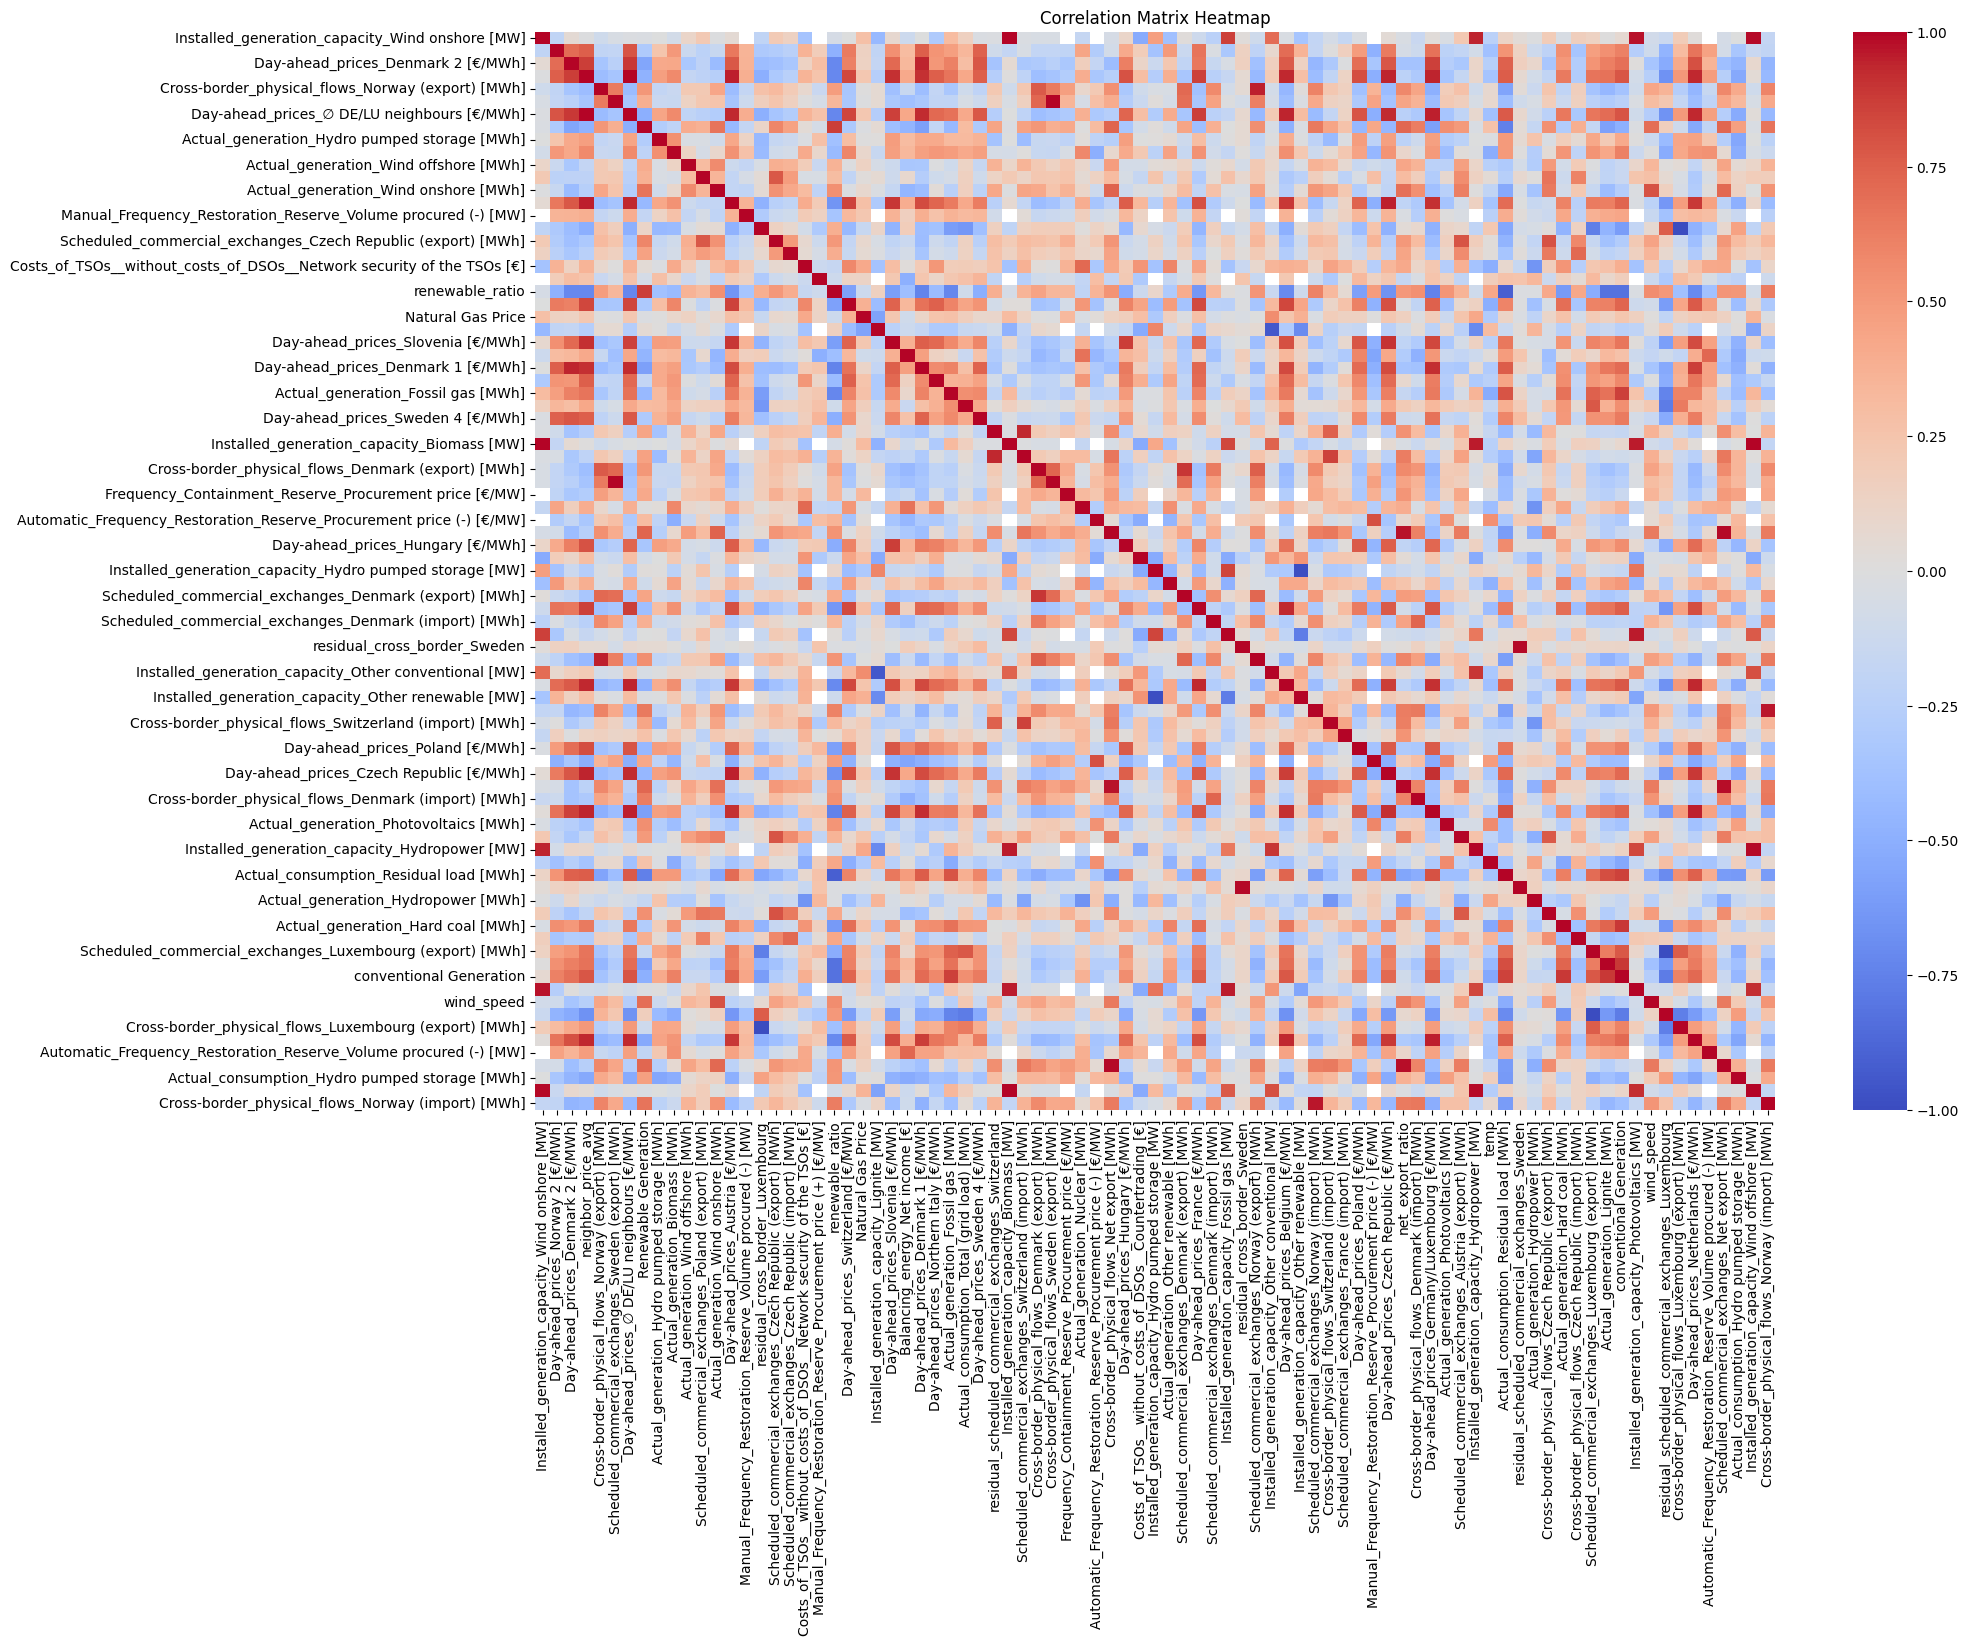

In [ ]:

corr_matrix = resampled_df[list(correlated_union_features)].corr()
plt.figure(figsize=(20, 14))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
import pandas as pd
import numpy as np

threshold = 0.9
cols=[col for col in list(correlated_union_features) if 'Day-ahead_prices' not in col]
corr_matrix = resampled_df[cols].corr()

high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr_matrix.index[i], corr_matrix.columns[j]))

features_to_remove = set()
for feature1, feature2 in high_corr_pairs:
    features_to_remove.add(feature2)

print(len(features_to_remove))
features_to_remove


27


{'Cross-border_physical_flows_Norway (import) [MWh]',
 'Installed_generation_capacity_Biomass [MW]',
 'Installed_generation_capacity_Fossil gas [MW]',
 'Installed_generation_capacity_Hydropower [MW]',
 'Installed_generation_capacity_Other conventional [MW]',
 'Installed_generation_capacity_Other renewable [MW]',
 'Installed_generation_capacity_Photovoltaics [MW]',
 'Installed_generation_capacity_Wind offshore [MW]',
 'Scheduled_commercial_exchanges_Net export [MWh]',
 'Scheduled_commercial_exchanges_Norway (export) [MWh]',
 'Scheduled_commercial_exchanges_Sweden (export) [MWh]',
 'Scheduled_commercial_exchanges_Switzerland (import) [MWh]',
 'net_export_ratio',
 'price_lag_168hAustria [€/MWh]',
 'price_lag_168hFrance [€/MWh]',
 'price_lag_168h∅ DE/LU neighbours [€/MWh]',
 'price_lag_24hAustria [€/MWh]',
 'price_lag_24hCzech Republic [€/MWh]',
 'price_lag_24hDenmark 1 [€/MWh]',
 'price_lag_24hFrance [€/MWh]',
 'price_lag_24hGermany/Luxembourg [€/MWh]',
 'price_lag_24hNetherlands [€/MWh]'

81


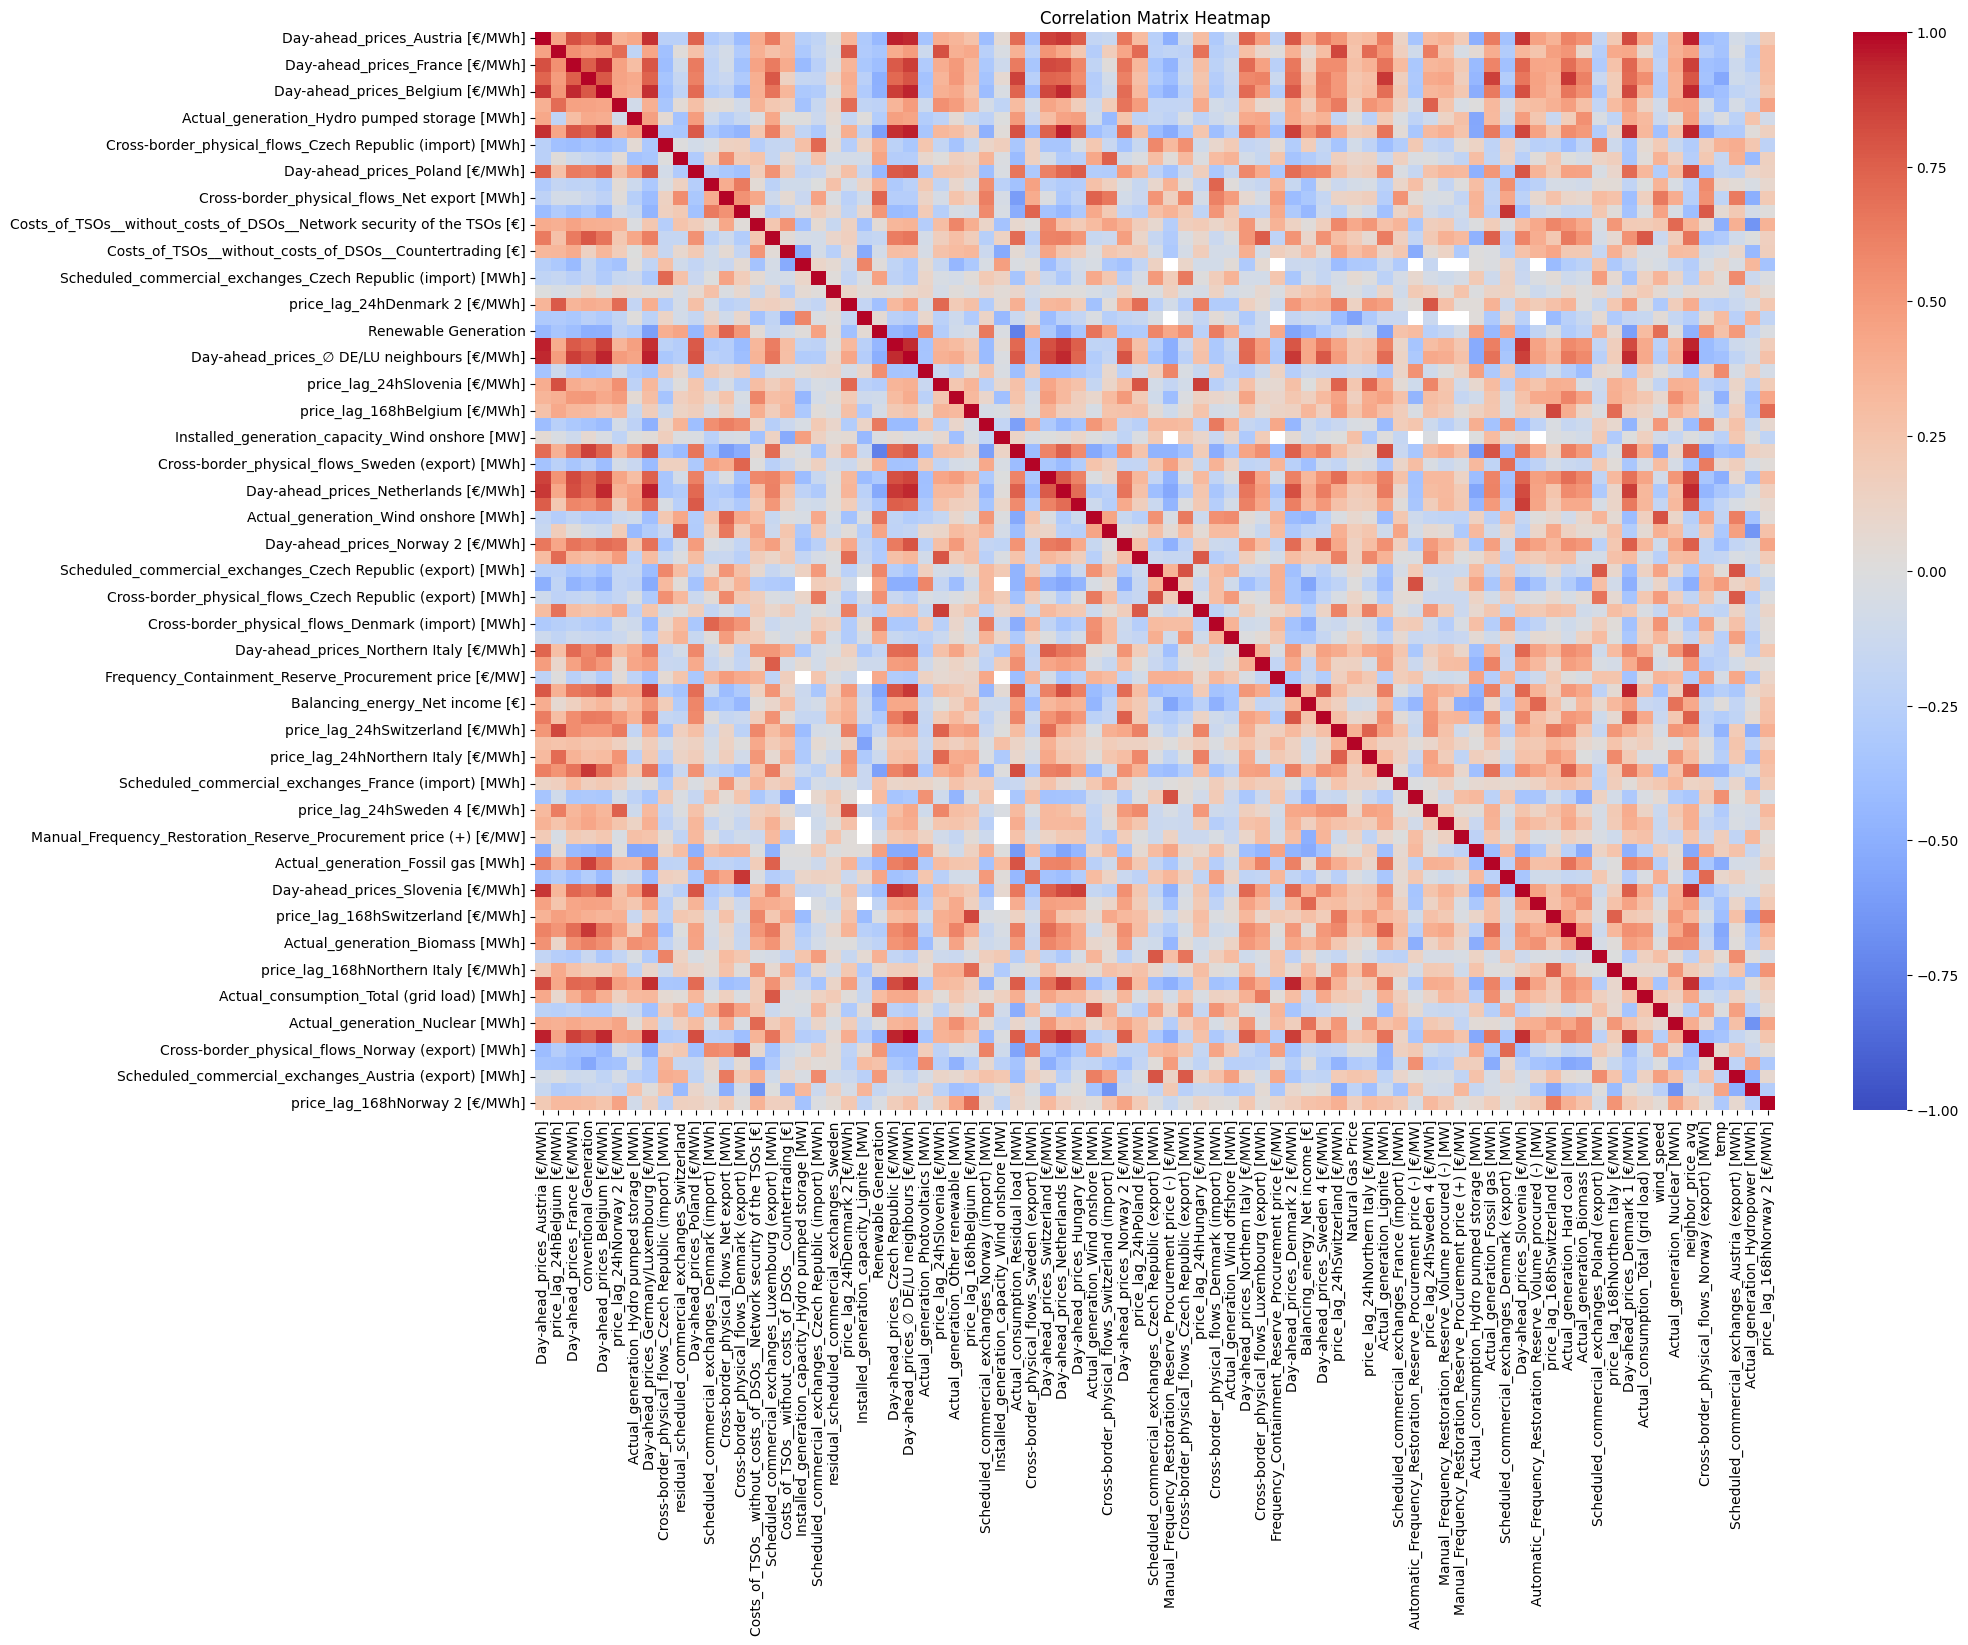

In [ ]:
filtered_features_list = [item for item in list(correlated_union_features) if item not in features_to_remove]
print(len(filtered_features_list))
corr_matrix = resampled_df[filtered_features_list].corr()
plt.figure(figsize=(20, 14))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
resampled_df[filtered_features_list]

Day-ahead_prices_Austria [€/MWh]  price_lag_24hBelgium [€/MWh]  \
0                                 12.06                           NaN   
1                                 -0.10                           NaN   
2                                 -0.66                           NaN   
3                                 -1.99                           NaN   
4                                 -2.42                           NaN   
...                                 ...                           ...   
19047                            170.59                          0.49   
19048                            149.92                         54.76   
19049                            134.44                         81.91   
19050                            130.32                        108.17   
19051                            121.23                        139.46   

       Day-ahead_prices_France [€/MWh]  conventional Generation  \
0                                 0.00                2894.8750   
1                                -0.10                2851.2500   
2                                -1.33                2831.3125   
3                                -4.08                2849.6250   
4                                -4.16                2818.5625   
...                                ...                      ...   
19047                           164.93                   0.0000   
19048                           132.00                   0.0000   
19049                           117.62                   0.0000   
19050                           113.45                   0.0000   
19051                           109.04                   0.0000   

       Day-ahead_prices_Belgium [€/MWh]  price_lag_24hNorway 2 [€/MWh]  \
0                                 -4.39                            NaN   
1                                 -1.75                            NaN   
2                                 -1.46                            NaN   
3                                 -5.27                            NaN   
4                                 -4.41                            NaN   
...                                 ...                            ...   
19047                            164.18                          26.34   
19048                            134.28                          33.02   
19049                            115.83                          34.64   
19050                            114.57                          34.94   
19051                            107.82                          35.71   

       Actual_generation_Hydro pumped storage [MWh]  \
0                                           68.8750   
1                                           40.6875   
2                                           24.8125   
3                                           42.8750   
4                                           33.9375   
...                                             ...   
19047                                           NaN   
19048                                           NaN   
19049                                           NaN   
19050                                           NaN   
19051                                           NaN   

       Day-ahead_prices_Germany/Luxembourg [€/MWh]  \
0                                            -5.17   
1                                            -1.07   
2                                            -1.47   
3                                            -5.08   
4                                            -4.49   
...                                            ...   
19047                                       163.67   
19048                                       134.13   
19049                                       114.38   
19050                                       114.41   
19051                                       106.81   

       Cross-border_physical_flows_Czech Republic (import) [MWh]  \
0                                              -203.1875  

In [ ]:
resampled_df[filtered_features_list].isnull().sum()[:30]

Cross-border_physical_flows_Norway (export) [MWh]                            4
Scheduled_commercial_exchanges_Net export [MWh]                              0
price_lag_24hNorthern Italy [€/MWh]                                       1514
Day-ahead_prices_Switzerland [€/MWh]                                         0
Natural Gas Price                                                         6043
Actual_consumption_Total (grid load) [MWh]                                   5
price_lag_168hSwitzerland [€/MWh]                                           44
Scheduled_commercial_exchanges_Denmark (export) [MWh]                        0
price_lag_24hPoland [€/MWh]                                                  8
Actual_generation_Nuclear [MWh]                                           9586
Renewable Generation                                                         0
price_lag_24hSlovenia [€/MWh]                                                8
neighbor_price_avg                                                           0
Installed_generation_capacity_Wind onshore [MW]                              0
Day-ahead_prices_Netherlands [€/MWh]                                         0
Day-ahead_prices_Northern Italy [€/MWh]                                   1512
Actual_generation_Hydropower [MWh]                                           5
Cross-border_physical_flows_Sweden (export) [MWh]                            4
price_lag_24hDenmark 2 [€/MWh]                                               8
Day-ahead_prices_Czech Republic [€/MWh]                                      0
Cross-border_physical_flows_Denmark (import) [MWh]                           4
Day-ahead_prices_Poland [€/MWh]                                              0
Scheduled_commercial_exchanges_Norway (import) [MWh]                         0
Scheduled_commercial_exchanges_Luxembourg (export) [MWh]                     0
Day-ahead_prices_Hungary [€/MWh]                                             0
Day-ahead_prices_Germany/Luxembourg [€/MWh]                                  0
Day-ahead_prices_Denmark 2 [€/MWh]                                           0
Day-ahead_prices_Austria [€/MWh]                                             0
Costs_of_TSOs__without_costs_of_DSOs__Network security of the TSOs [€]    1512
Actual_consumption_Hydro pumped storage [MWh]                                5
dtype: int64

In [ ]:
resampled_df[filtered_features_list].isnull().sum()[30:]

Balancing_energy_Net income [€]                                         19030
Day-ahead_prices_Sweden 4 [€/MWh]                                           0
Cross-border_physical_flows_Switzerland (import) [MWh]                      4
residual_scheduled_commercial_exchanges_Sweden                              0
Manual_Frequency_Restoration_Reserve_Volume procured (-) [MW]           14710
Automatic_Frequency_Restoration_Reserve_Procurement price (-) [€/MW]    14710
Day-ahead_prices_∅ DE/LU neighbours [€/MWh]                                 0
temp                                                                        0
residual_cross_border_Luxembourg                                            4
Scheduled_commercial_exchanges_Czech Republic (export) [MWh]                0
Actual_generation_Biomass [MWh]                                             5
Installed_generation_capacity_Other conventional [MW]                       0
Actual_generation_Hard coal [MWh]                                           5
price_lag_168hNorway 2 [€/MWh]                                             44
price_lag_24hSweden 4 [€/MWh]                                               8
Actual_generation_Hydro pumped storage [MWh]                                5
Scheduled_commercial_exchanges_Austria (export) [MWh]                       0
wind_speed                                                                  0
Actual_generation_Other renewable [MWh]                                     5
Cross-border_physical_flows_Czech Republic (import) [MWh]                   4
Day-ahead_prices_France [€/MWh]                                             0
Day-ahead_prices_Belgium [€/MWh]                                            0
Costs_of_TSOs__without_costs_of_DSOs__Countertrading [€]                 1512
Scheduled_commercial_exchanges_France (import) [MWh]                        0
Day-ahead_prices_Denmark 1 [€/MWh]                                          0
Scheduled_commercial_exchanges_Denmark (import) [MWh]                       0
Day-ahead_prices_Norway 2 [€/MWh]                                           0
Scheduled_commercial_exchanges_Czech Republic (import) [MWh]                0
Scheduled_commercial_exchanges_Poland (export) [MWh]                        0
Actual_generation_Wind offshore [MWh]                                       4
Day-ahead_prices_Slovenia [€/MWh]                                           0
price_lag_168hNorthern Italy [€/MWh]                                     1514
Manual_Frequency_Restoration_Reserve_Procurement price (+) [€/MW]       14710
Automatic_Frequency_Restoration_Reserve_Volume procured (-) [MW]        14710
Actual_generation_Photovoltaics [MWh]                                       5
price_lag_24hNorway 2 [€/MWh]                                               8
Frequency_Containment_Reserve_Procurement price [€/MW]                  14710
dtype: int64

In [ ]:
resampled_df[filtered_features_list+['End date']].to_csv('resampled_selected_features_19052_68.csv', )

In [ ]:
resampled_df[['End date']+filtered_features_list].to_csv('resampled_selected_features_19052_82.csv', index=False )

### Feature Distribution Before Transformatio

##### all features

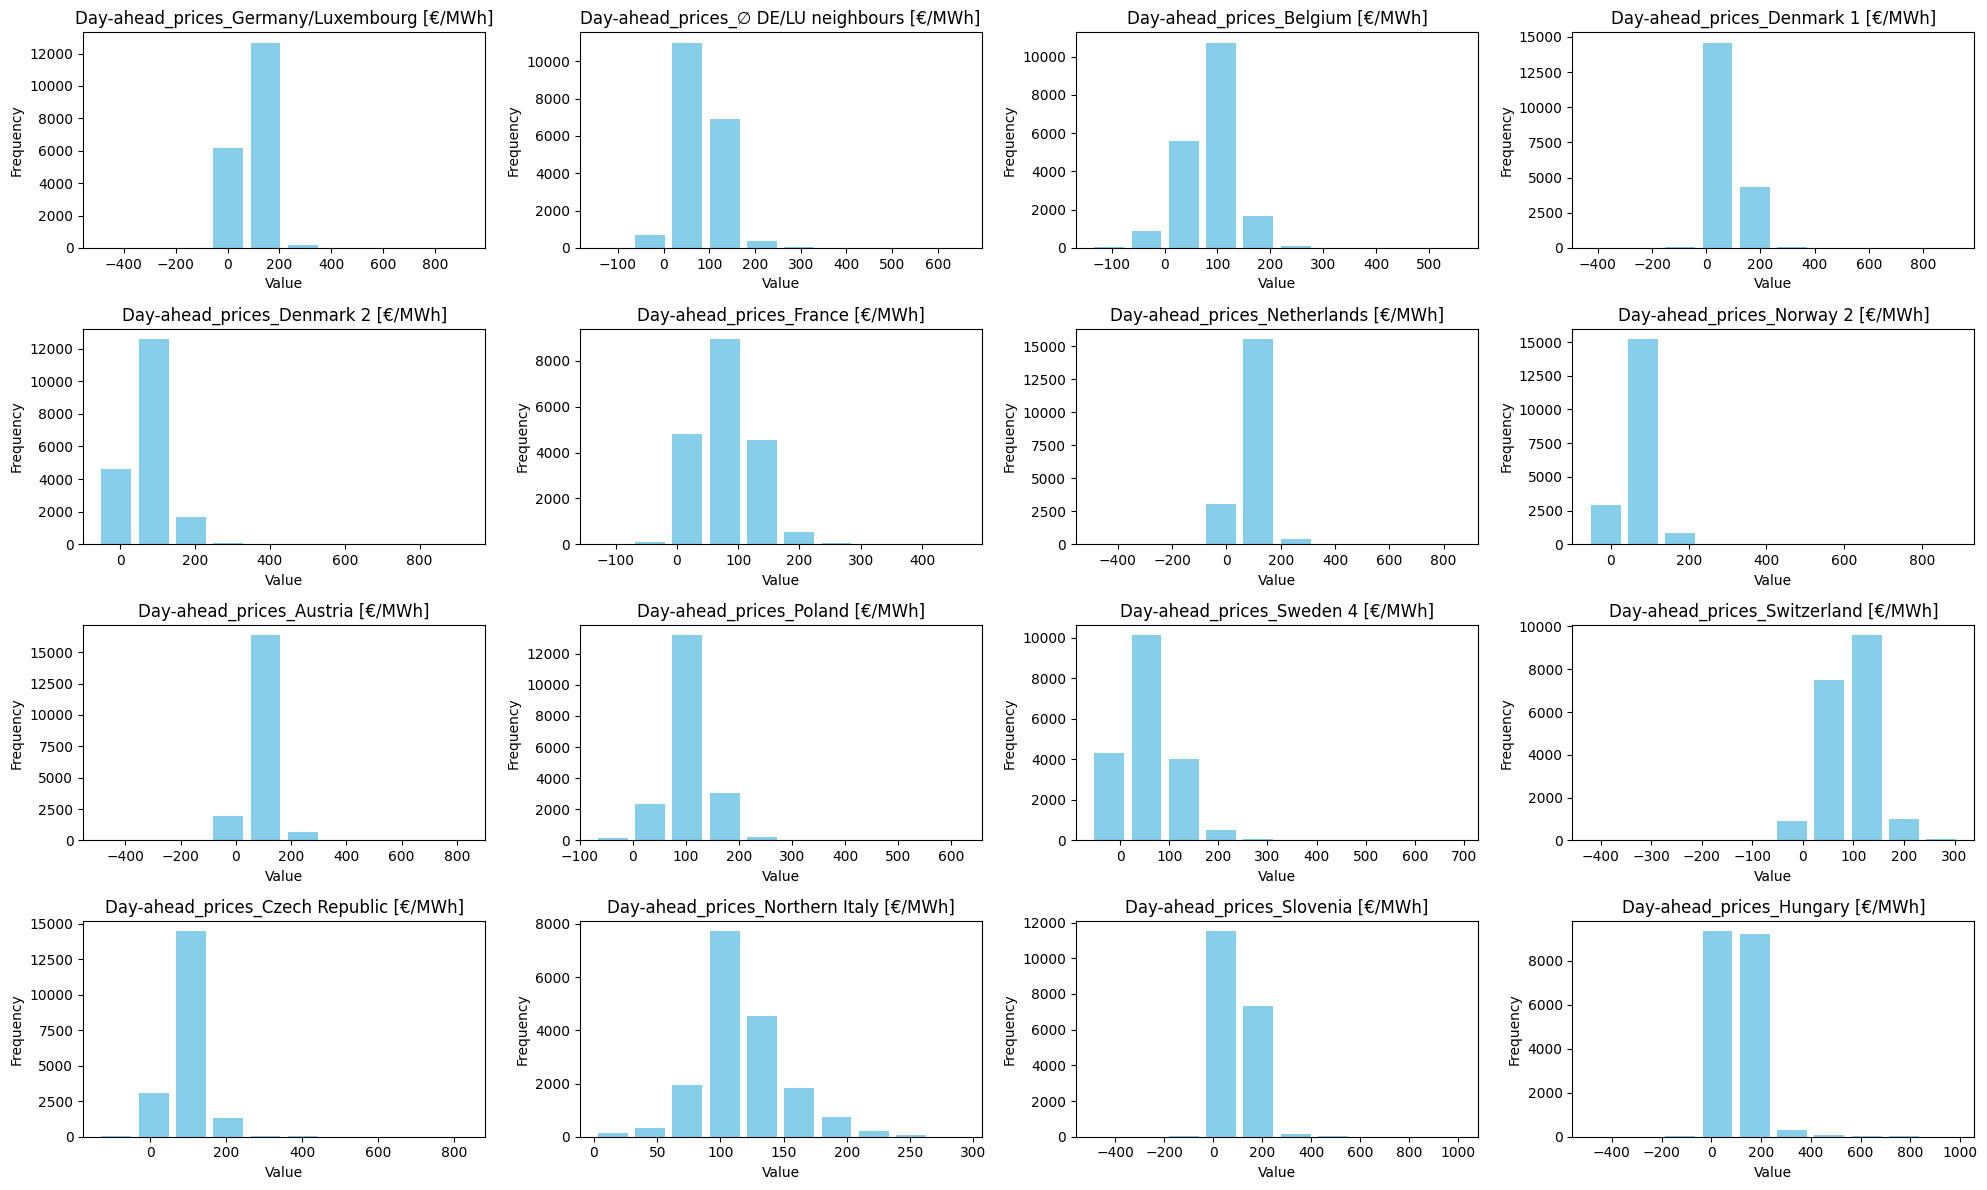

In [ ]:
fig, axs = plt.subplots(4,4, figsize=(20, 12))

for i, category in enumerate(price_cols):
    row = i // 4  # Determine the row index
    col = i % 4   # Determine the column index
    ax = axs[row][col]
    ax.hist(resampled_df[category], bins=10,rwidth=0.8, color='skyblue', )
    ax.set_title(category)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

12


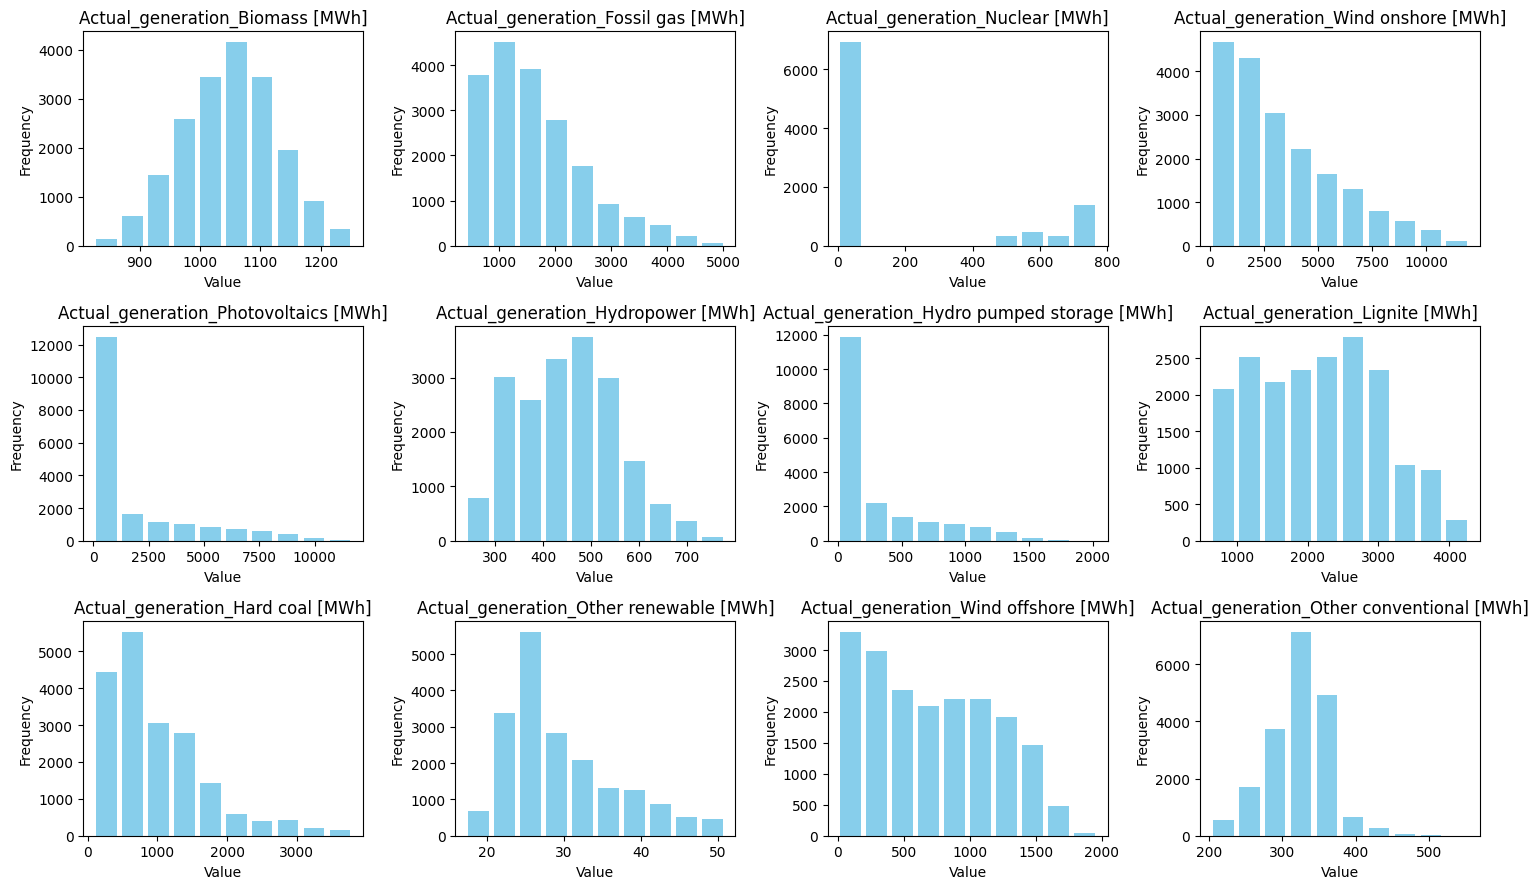

In [ ]:
gen_cols = [col for col in merged_df.columns if 'Actual_generation' in col]
print(len(gen_cols))
fig, axs = plt.subplots(3,4, figsize=(15, 9))

for i, category in enumerate(gen_cols):
    row = i % 3  # Determine the row index
    col = i % 4   # Determine the column index
    ax = axs[row][col]
    ax.hist(resampled_df[category], bins=10,rwidth=0.8, color='skyblue', )
    ax.set_title(category)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

3


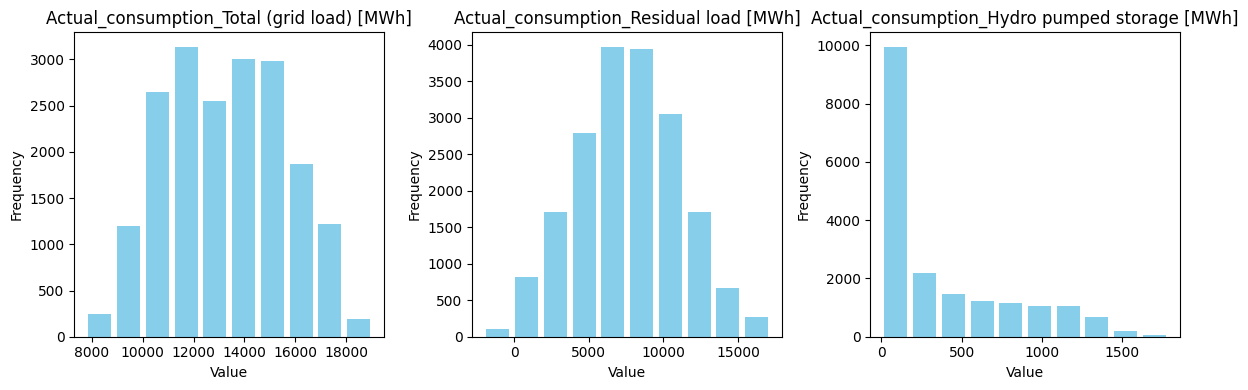

In [ ]:

con_cols = [col for col in resampled_df.columns if 'Actual_consumption_' in col]
print(len(con_cols))
fig, axs = plt.subplots(1,3, figsize=(12,4))

for i, category in enumerate(con_cols):
    row = 0  # Determine the row index
    col = i % 3   # Determine the column index
    ax = axs[col]
    ax.hist(resampled_df[category], bins=10,rwidth=0.8, color='skyblue', )
    ax.set_title(category)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

23


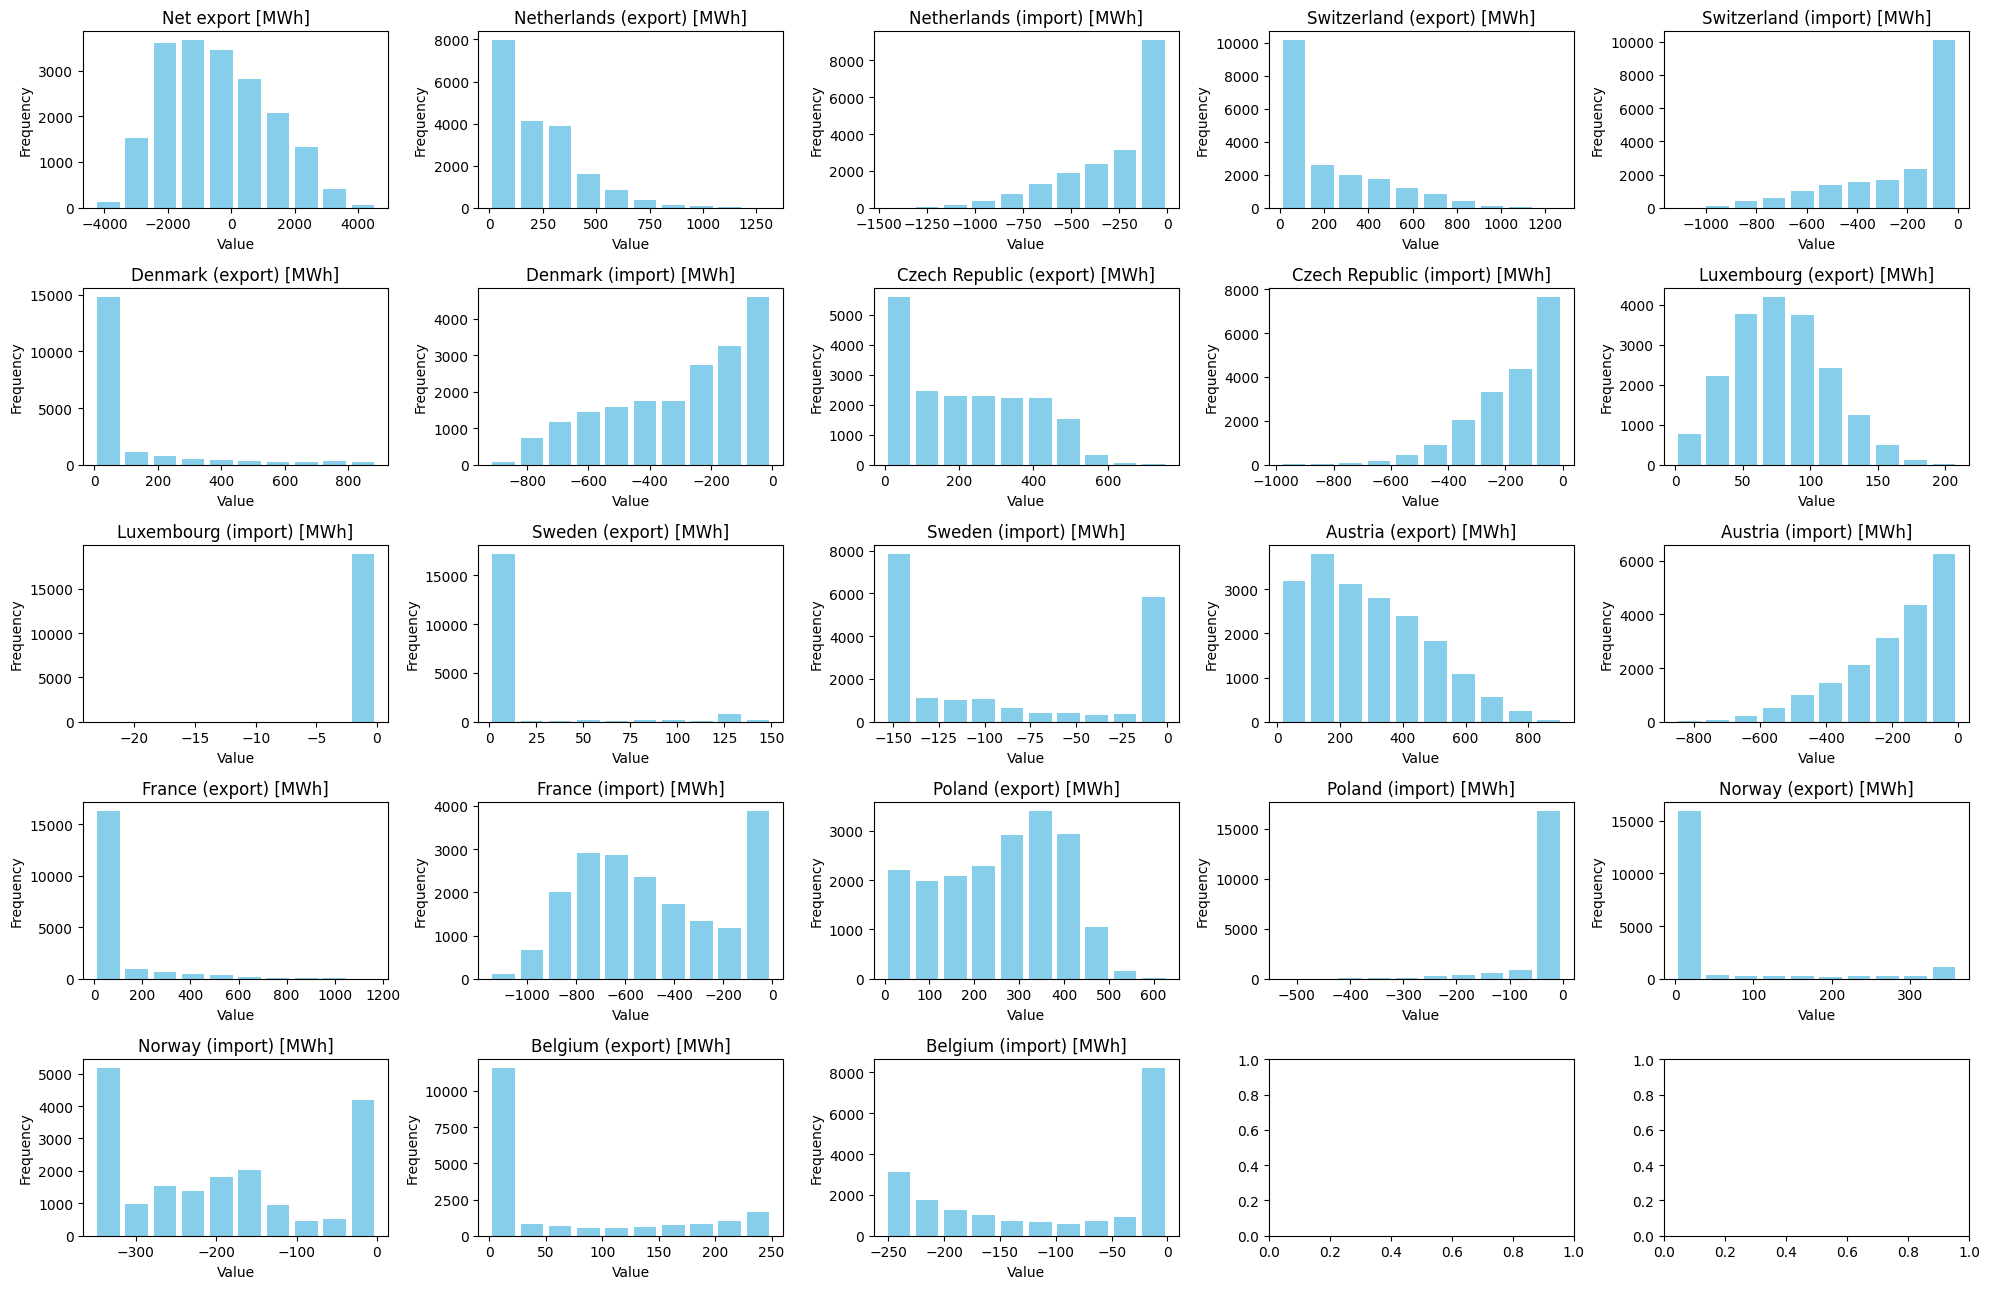

In [ ]:
cb_cols = [col for col in merged_df.columns if 'Cross-border_physical' in col]
print(len(cb_cols))
fig, axs = plt.subplots(5,5, figsize=(20, 13))

for i, category in enumerate(cb_cols):
    row = i // 5  # Determine the row index
    col = i % 5   # Determine the column index
    ax = axs[row][col]
    ax.hist(resampled_df[category], bins=10,rwidth=0.8, color='skyblue', )
    ax.set_title(category.split("_")[-1])
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

23


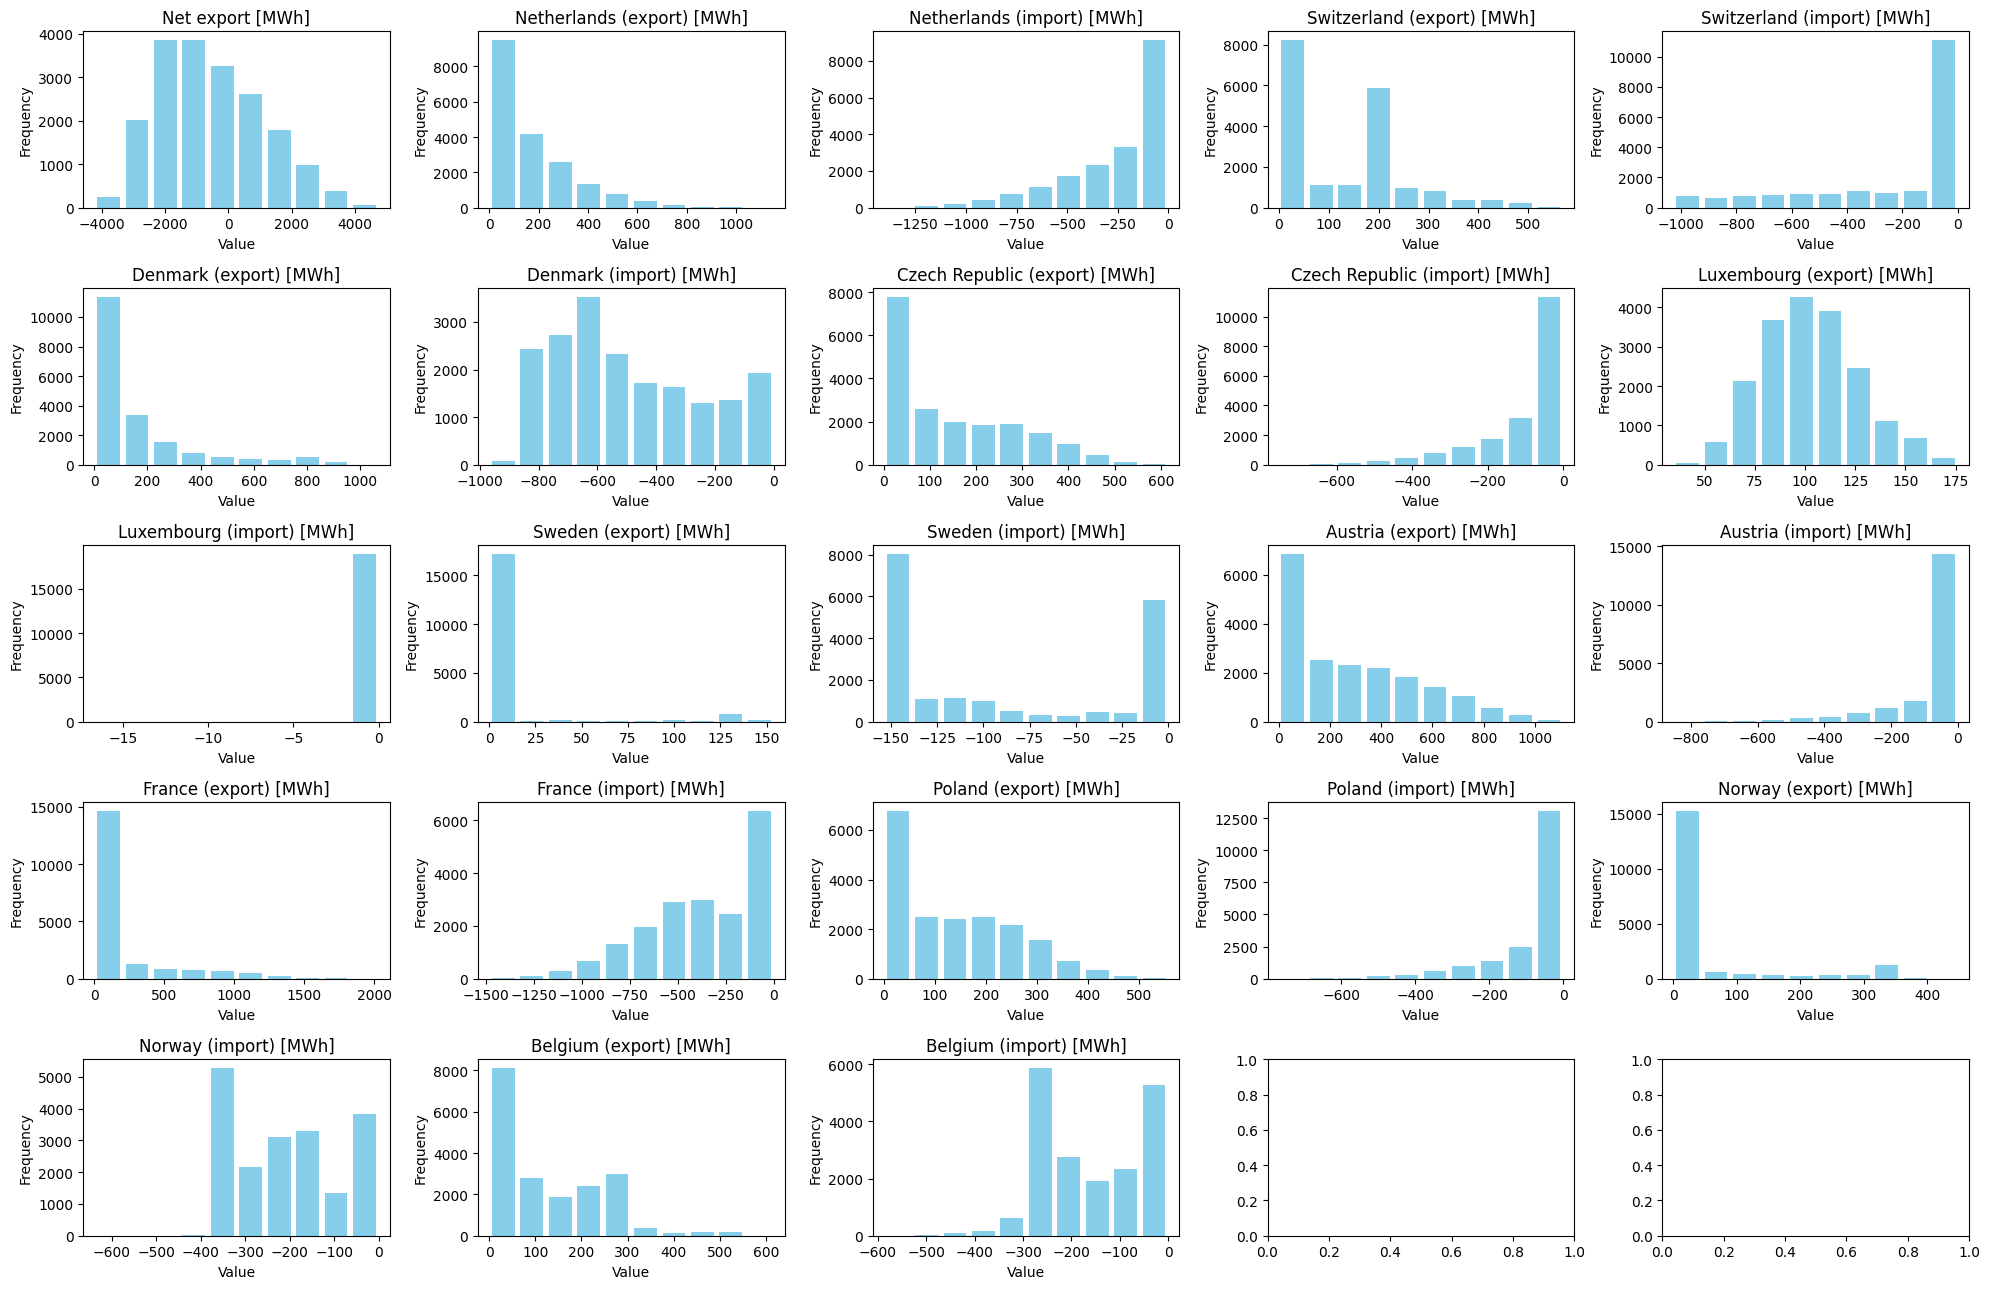

In [ ]:
cb_cols = [col for col in merged_df.columns if 'commercial' in col and 'residual' not in col]
print(len(cb_cols))
cb_cols
fig, axs = plt.subplots(5,5, figsize=(20, 13))

for i, category in enumerate(cb_cols):
    row = i // 5  # Determine the row index
    col = i % 5   # Determine the column index
    ax = axs[row][col]
    ax.hist(resampled_df[category], bins=10,rwidth=0.8, color='skyblue', )
    ax.set_title(category.split("_")[-1])
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

##### selected features for modeling

In [ ]:
df = pd.read_csv('resampled_selected_features_19052_68.csv')
df= df.drop(columns=['Unnamed: 0'])

In [ ]:
df.shape

(19052, 67)

5


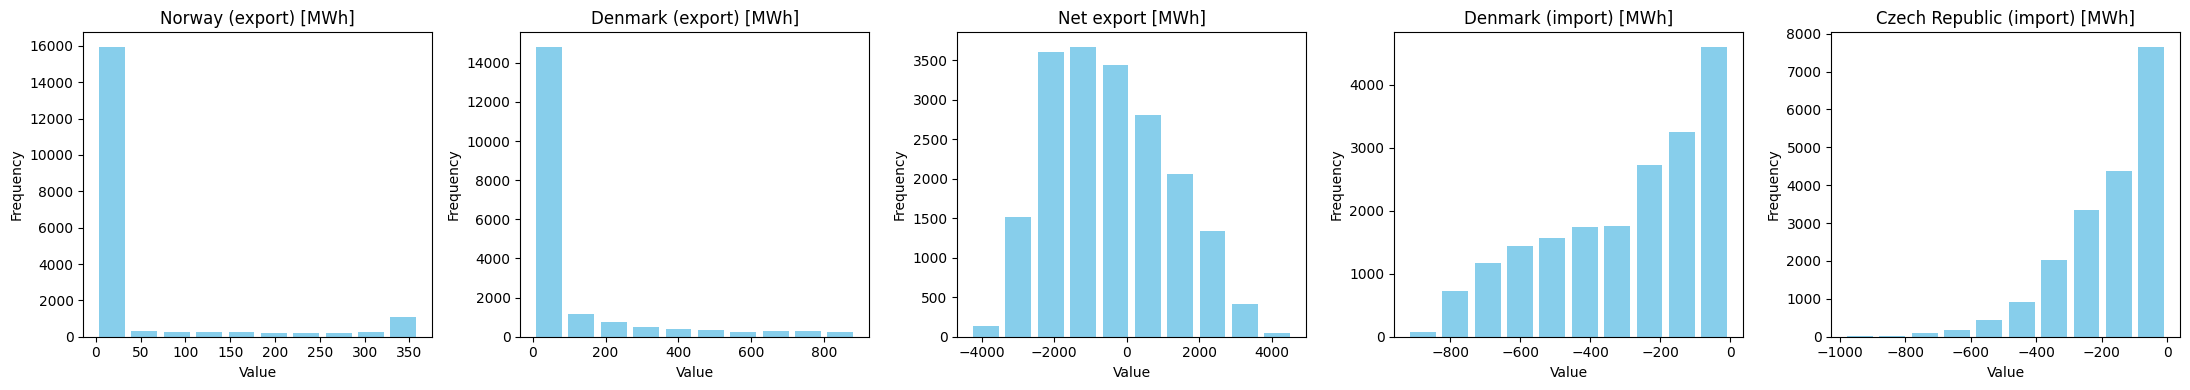

In [ ]:
cb_cols = [col for col in filtered_features_list if 'Cross-border_physical' in col]
print(len(cb_cols))
fig, axs = plt.subplots(1,5, figsize=(22, 4))

for i, category in enumerate(cb_cols):
    # row = i // 5  # Determine the row index
    col = i % 5   # Determine the column index
    ax = axs[col]
    ax.hist(resampled_df[category], bins=10,rwidth=0.8, color='skyblue', )
    ax.set_title(category.split("_")[-1])
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

10


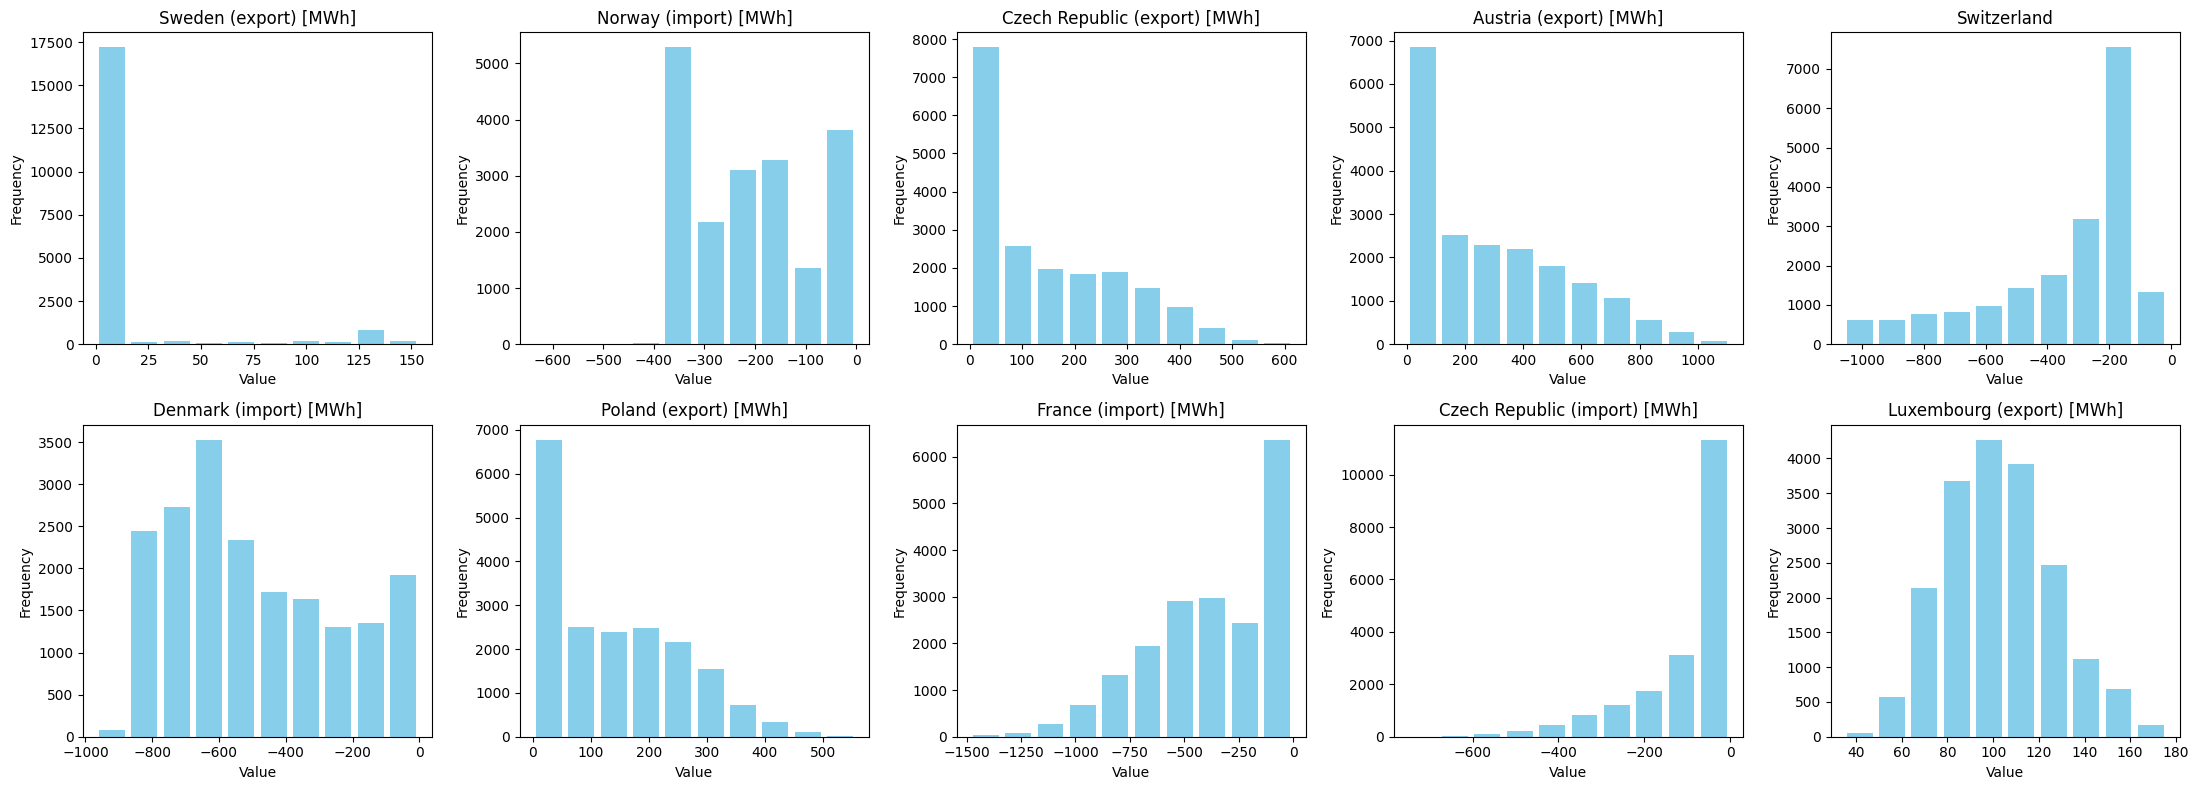

In [ ]:
cb_cols = [col for col in filtered_features_list if 'commercial' in col]
print(len(cb_cols))
fig, axs = plt.subplots(2,5, figsize=(22, 8))

for i, category in enumerate(cb_cols):
    row = i % 2  # Determine the row index
    col = i % 5   # Determine the column index
    ax = axs[row][col]
    ax.hist(resampled_df[category], bins=10,rwidth=0.8, color='skyblue', )
    ax.set_title(category.split("_")[-1])
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

### Missing values

In [ ]:
df = pd.read_csv('hourly_resampled_df_19052_212.csv')

NameError: name 'pd' is not defined

In [ ]:
missed = pd.DataFrame({
    'column_name': df.columns,
    'number_of_missing_values': df.isnull().sum(),
    'percentage_of_missing_values': (df.isnull().sum() / len(df)) * 100
})
missed[(missed['percentage_of_missing_values'] >0)]

column_name  \
Manual_Frequency_Restoration_Reserve_Procuremen...  Manual_Frequency_Restoration_Reserve_Procureme...   
price_lag_24hNorthern Italy [€/MWh]                               price_lag_24hNorthern Italy [€/MWh]   
Manual_Frequency_Restoration_Reserve_Procuremen...  Manual_Frequency_Restoration_Reserve_Procureme...   
Manual_Frequency_Restoration_Reserve_Volume pro...  Manual_Frequency_Restoration_Reserve_Volume pr...   
Actual_generation_Nuclear [MWh]                                       Actual_generation_Nuclear [MWh]   
price_lag_168hNorthern Italy [€/MWh]                             price_lag_168hNorthern Italy [€/MWh]   
Natural Gas Price                                                                   Natural Gas Price   
Automatic_Frequency_Restoration_Reserve_Volume ...  Automatic_Frequency_Restoration_Reserve_Volume...   
Frequency_Containment_Reserve_Procurement price...  Frequency_Containment_Reserve_Procurement pric...   
Balancing_energy_Net income [€]                                       Balancing_energy_Net income [€]   
Costs_of_TSOs__without_costs_of_DSOs__Network s...  Costs_of_TSOs__without_costs_of_DSOs__Network ...   
Costs_of_TSOs__without_costs_of_DSOs__Countertr...  Costs_of_TSOs__without_costs_of_DSOs__Countert...   
Automatic_Frequency_Restoration_Reserve_Procure...  Automatic_Frequency_Restoration_Reserve_Procur...   
Day-ahead_prices_Northern Italy [€/MWh]                       Day-ahead_prices_Northern Italy [€/MWh]   

                                                    number_of_missing_values  \
Manual_Frequency_Restoration_Reserve_Procuremen...                     14710   
price_lag_24hNorthern Italy [€/MWh]                                     1514   
Manual_Frequency_Restoration_Reserve_Procuremen...                     14710   
Manual_Frequency_Restoration_Reserve_Volume pro...                     14710   
Actual_generation_Nuclear [MWh]                                         9586   
price_lag_168hNorthern Italy [€/MWh]                                    1514   
Natural Gas Price                                                       6043   
Automatic_Frequency_Restoration_Reserve_Volume ...                     14710   
Frequency_Containment_Reserve_Procurement price...                     14710   
Balancing_energy_Net income [€]                                        19030   
Costs_of_TSOs__without_costs_of_DSOs__Network s...                      1512   
Costs_of_TSOs__without_costs_of_DSOs__Countertr...                      1512   
Automatic_Frequency_Restoration_Reserve_Procure...                     14710   
Day-ahead_prices_Northern Italy [€/MWh]                                 1512   

                                                    percentage_of_missing_values  
Manual_Frequency_Restoration_Reserve_Procuremen...                     77.209742  
price_lag_24hNorthern Italy [€/MWh]                                     7.946672  
Manual_Frequency_Restoration_Reserve_Procuremen...                     77.209742  
Manual_Frequency_Restoration_Reserve_Volume pro...                     77.209742  
Actual_generation_Nuclear [MWh]                                        50.314928  
price_lag_168hNorthern Italy [€/MWh]                                    7.946672  
Natural Gas Price                                                      31.718455  
Automatic_Frequency_Restoration_Reserve_Volume ...                     77.209742  
Frequency_Containment_Reserve_Procurement price...                     77.209742  
Balancing_energy_Net income [€]                                        99.884527  
Costs_of_TSOs__without_costs_of_DSOs__Network s...                      7.936175  
Costs_of_TSOs__without_costs_of_DSOs__Countertr...                      7.936175  
Automatic_Frequency_Restoration_Reserve_Procure...                     77.209742  
Day-ahead_prices_Northern Italy [€/MWh]                                 7.936175

In [ ]:
columns_to_fill = missed[(missed['percentage_of_missing_values'] < 5) & (missed['percentage_of_missing_values'] >0)].index
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].median())

In [ ]:
columns_to_remove = missed[missed['percentage_of_missing_values'] > 40].index
# df.drop(columns=columns_to_remove, inplace=True)
df[columns_to_remove] = df[columns_to_remove].fillna(-999999)

In [ ]:
df[missed[missed['percentage_of_missing_values'] > 40].index].describe()

Manual_Frequency_Restoration_Reserve_Procurement price (+) [€/MW]  \
count                                       19052.000000                   
mean                                      -772096.534314                   
std                                        419490.228145                   
min                                       -999999.000000                   
25%                                       -999999.000000                   
50%                                       -999999.000000                   
75%                                       -999999.000000                   
max                                             5.870000                   

       Manual_Frequency_Restoration_Reserve_Procurement price (-) [€/MW]  \
count                                       19052.000000                   
mean                                      -772096.348484                   
std                                        419490.570196                   
min                                       -999999.000000                   
25%                                       -999999.000000                   
50%                                       -999999.000000                   
75%                                       -999999.000000                   
max                                            24.570000                   

       Manual_Frequency_Restoration_Reserve_Volume procured (-) [MW]  \
count                                       19052.000000               
mean                                      -772000.108309               
std                                        419667.716078               
min                                       -999999.000000               
25%                                       -999999.000000               
50%                                       -999999.000000               
75%                                       -999999.000000               
max                                           731.000000               

       Actual_generation_Nuclear [MWh]  \
count                     19052.000000   
mean                    -503060.381991   
std                      500091.699795   
min                     -999999.000000   
25%                     -999999.000000   
50%                     -999999.000000   
75%                           0.000000   
max                         770.750000   

       Automatic_Frequency_Restoration_Reserve_Volume procured (-) [MW]  \
count                                       19052.000000                  
mean                                      -771604.439691                  
std                                        420396.018043                  
min                                       -999999.000000                  
25%                                       -999999.000000                  
50%                                       -999999.000000                  
75%                                       -999999.000000                  
max                                          3041.000000                  

       Frequency_Containment_Reserve_Procurement price [€/MW]  \
count                                       19052.000000        
mean                                      -772095.900838        
std                                        419491.394157        
min                                       -999999.000000        
25%                                       -999999.000000        
50%                                       -999999.000000        
75%                                       -999999.000000        
max                                            15.530000        

       Balancing_energy_Net income [€]  \
count                     1.905200e+04   
mean                     -9.682009e+05   
std                       1.027566e+06   
min                      -9.999990e+05   
25%                      -9.999990e+05   
50%                      -9.999990e+05   
75%                      -9.999990e+05   
max        

In [ ]:
columns_to_remove = missed[missed['percentage_of_missing_values'] > 0].index
# df.drop(columns=columns_to_remove, inplace=True)
# df[columns_to_remove] = df[columns_to_remove].fillna(df[columns_to_remove].median())
df[columns_to_remove] = df[columns_to_remove].fillna(-999999)


In [ ]:
df[missed[missed['percentage_of_missing_values'] > 0].index].describe()


price_lag_24hNorthern Italy [€/MWh]  \
count                         17538.000000   
mean                            117.578565   
std                              33.889740   
min                               0.100000   
25%                              97.750000   
50%                             112.870000   
75%                             134.447500   
max                             295.000000   

       price_lag_168hNorthern Italy [€/MWh]  Natural Gas Price  \
count                          17538.000000       13009.000000   
mean                             117.581744           2.500331   
std                               33.894655           0.881072   
min                                0.100000           1.210000   
25%                               97.750000           2.040000   
50%                              112.870000           2.430000   
75%                              134.447500           2.720000   
max                              295.000000          13.200000   

       Costs_of_TSOs__without_costs_of_DSOs__Network security of the TSOs [€]  \
count                                       1.754000e+04                        
mean                                        1.831472e+08                        
std                                         9.230289e+07                        
min                                         4.466027e+07                        
25%                                         9.176959e+07                        
50%                                         1.788560e+08                        
75%                                         2.161964e+08                        
max                                         3.982759e+08                        

       Costs_of_TSOs__without_costs_of_DSOs__Countertrading [€]  \
count                                       1.754000e+04          
mean                                        1.113894e+07          
std                                         6.783029e+06          
min                                         3.216814e+06          
25%                                         4.813199e+06          
50%                                         8.154857e+06          
75%                                         1.751942e+07          
max                                         2.480819e+07          

       Day-ahead_prices_Northern Italy [€/MWh]  
count                             17540.000000  
mean                                117.582204  
std                                  33.893318  
min                                   0.100000  
25%                                  97.750000  
50%                                 112.870000  
75%                                 134.457500  
max                                 295.000000

In [ ]:
missed = pd.DataFrame({
    'column_name': df.columns,
    'number_of_missing_values': df.isnull().sum(),
    'percentage_of_missing_values': (df.isnull().sum() / len(df)) * 100
})
missed[(missed['percentage_of_missing_values'] >0)]

Empty DataFrame
Columns: [column_name, number_of_missing_values, percentage_of_missing_values]
Index: []

### Transformation setupe based on skewness and kurtosis

In [ ]:
black = '\033[30m'
red = '\033[31m'
green = '\033[32m'
yellow = '\033[33m'
blue = '\033[34m'
magenta = '\033[35m'
cyan = '\033[36m'
white = '\033[37m'
orange = "\033[38;5;208m"
bold = '\033[1m'
reset = '\033[0m'


In [ ]:
df.drop(columns=['End date'], inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
price_cols = [col for col in df.columns if 'day-ahead_prices' in col.lower()]
std_cols = [col for col in df.columns if col not in price_cols]

scaler = StandardScaler()
transformed_df = df.copy()
transformed_df[std_cols] = scaler.fit_transform(transformed_df[std_cols])

for col in transformed_df.columns:
    mean = transformed_df[col].mean()
    # Use ddof=0 to match StandardScaler's population std
    std_dev = transformed_df[col].std(ddof=0)
    if abs(mean) < 1e-6 and abs(std_dev - 1) < 1e-3:
        print(f"{col}: Transformed")
    else:
        print(f"{col}: Not Transformed")


price_lag_24hBelgium [€/MWh]: Transformed
Manual_Frequency_Restoration_Reserve_Procurement price (+) [€/MW]: Transformed
Actual_generation_Biomass [MWh]: Transformed
Scheduled_commercial_exchanges_Czech Republic (export) [MWh]: Transformed
residual_scheduled_commercial_exchanges_Sweden: Transformed
Renewable Generation: Transformed
price_lag_168hNorway 2 [€/MWh]: Transformed
price_lag_24hSlovenia [€/MWh]: Transformed
Day-ahead_prices_Switzerland [€/MWh]: Not Transformed
Cross-border_physical_flows_Czech Republic (export) [MWh]: Transformed
price_lag_24hNorway 2 [€/MWh]: Transformed
Day-ahead_prices_Netherlands [€/MWh]: Not Transformed
Scheduled_commercial_exchanges_Poland (export) [MWh]: Transformed
price_lag_24hNorthern Italy [€/MWh]: Transformed
Actual_generation_Fossil gas [MWh]: Transformed
temp: Transformed
price_lag_24hSweden 4 [€/MWh]: Transformed
Scheduled_commercial_exchanges_Austria (export) [MWh]: Transformed
net_export_ratio: Transformed
Actual_generation_Other renewable [M

In [ ]:
price_cols = [col for col in df.columns if 'day-ahead_prices' in col.lower()]
transformed_df[price_cols].describe()
transformed_df.to_csv('normalized_impute_neg_inf_83.csv', index=False)

In [ ]:
transformed_df, transformation_info = improved_transform_features(df[std_cols])
transformed_df[price_cols] = df[price_cols]
transformed_df.to_csv('khar.csv', index=False)


(19052, 51)


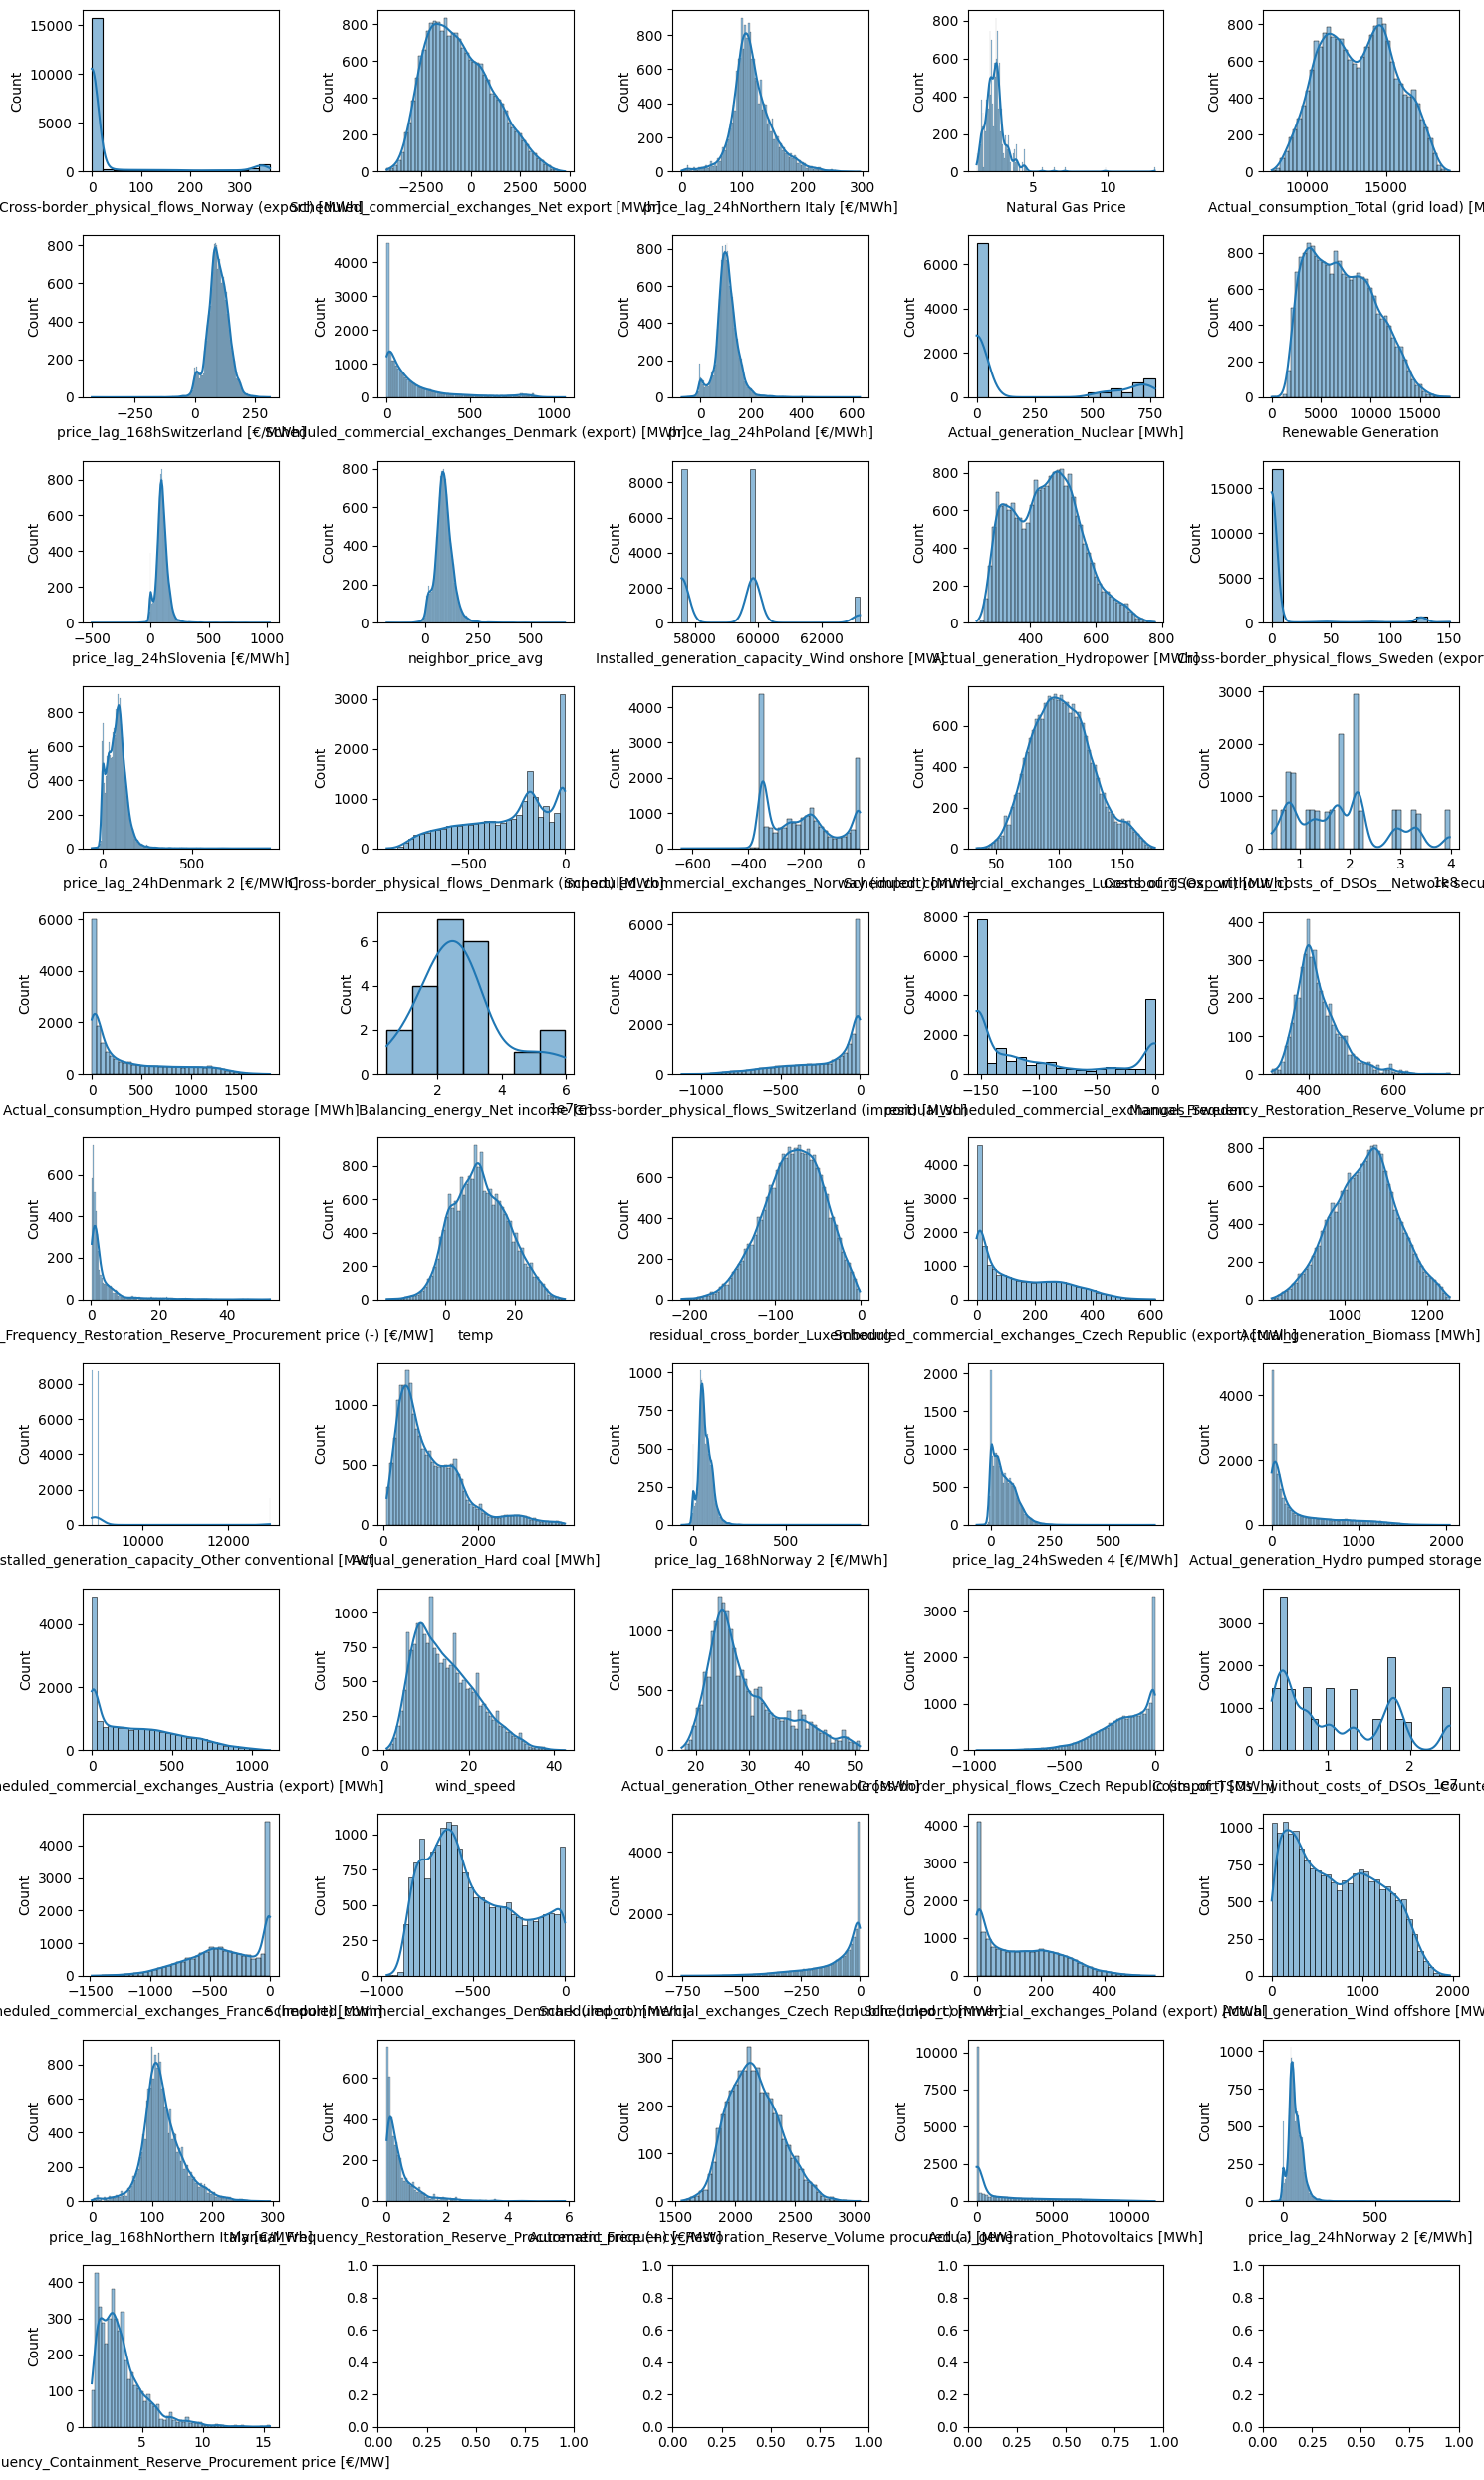

In [ ]:
original = resampled_df[[col for col in filtered_features_list if col not in price_cols]]

print(original.shape)
fig, axes = plt.subplots(ncols=5, nrows=int((len(original.columns) + 4) / 5), figsize=(15, 25))

for idx, column in enumerate(original.columns):
    row = idx // 5  # Calculate row by integer division
    col = idx % 5    # Calculate column by modulo operation

    sns.histplot(original[column], ax=axes[row][col], kde=True)

plt.tight_layout()
plt.show()


(19052, 51)


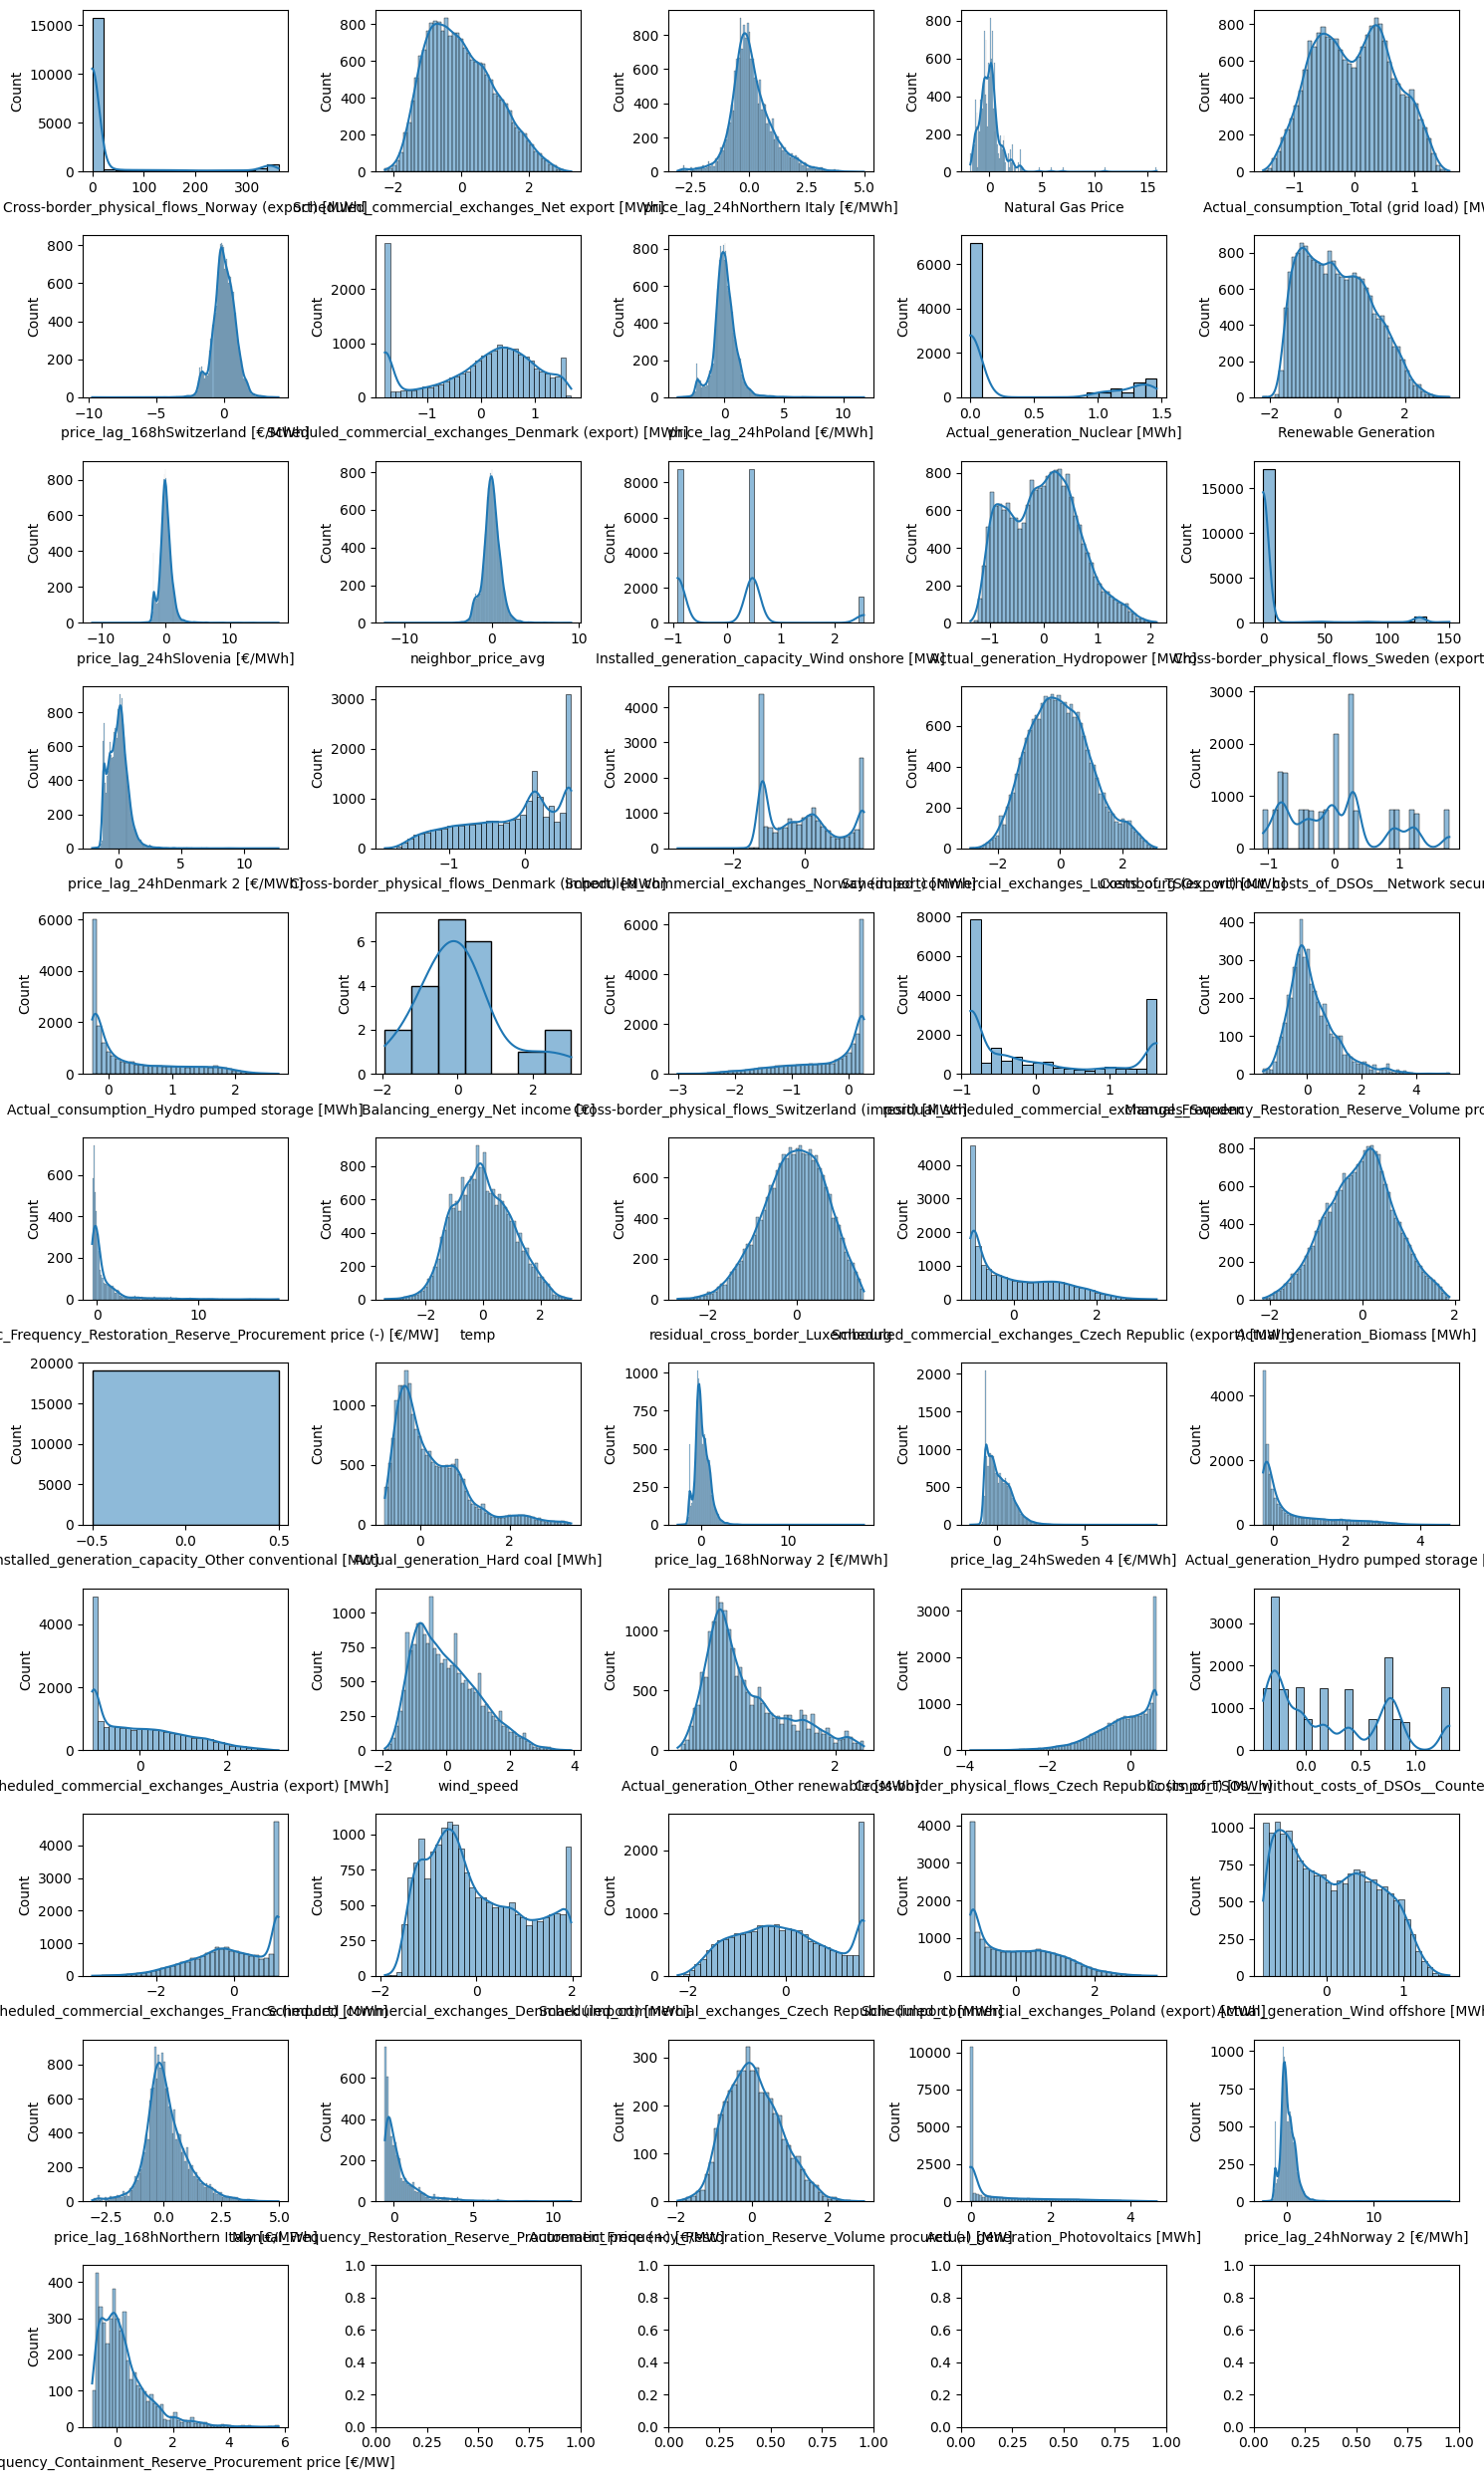

In [ ]:

print(transformed_df.shape)
fig, axes = plt.subplots(ncols=5, nrows=int((len(transformed_df.columns) + 4) / 5), figsize=(15, 25))

for idx, column in enumerate(transformed_df.columns):
    row = idx // 5  # Calculate row by integer division
    col = idx % 5    # Calculate column by modulo operation

    sns.histplot(transformed_df[column], ax=axes[row][col], kde=True)

plt.tight_layout()
plt.show()


In [ ]:
transformed_df[price_cols] = resampled_df[price_cols]
transformed_df.to_csv('feature_transformed.csv', index=False)

In [ ]:
transformed_df.columns

Index(['Cross-border_physical_flows_Norway (export) [MWh]',
       'Scheduled_commercial_exchanges_Net export [MWh]',
       'price_lag_24hNorthern Italy [€/MWh]', 'Natural Gas Price',
       'Actual_consumption_Total (grid load) [MWh]',
       'price_lag_168hSwitzerland [€/MWh]',
       'Scheduled_commercial_exchanges_Denmark (export) [MWh]',
       'price_lag_24hPoland [€/MWh]', 'Actual_generation_Nuclear [MWh]',
       'Renewable Generation', 'price_lag_24hSlovenia [€/MWh]',
       'neighbor_price_avg', 'Installed_generation_capacity_Wind onshore [MW]',
       'Actual_generation_Hydropower [MWh]',
       'Cross-border_physical_flows_Sweden (export) [MWh]',
       'price_lag_24hDenmark 2 [€/MWh]',
       'Cross-border_physical_flows_Denmark (import) [MWh]',
       'Scheduled_commercial_exchanges_Norway (import) [MWh]',
       'Scheduled_commercial_exchanges_Luxembourg (export) [MWh]',
       'Costs_of_TSOs__without_costs_of_DSOs__Network security of the TSOs [€]',
       'Actual_cons

In [ ]:
imputed_df = pd.read_csv('imputed_df_19052_98.csv')
imputed_df.set_index('End date', inplace=True)
price_cols = [col for col in imputed_df.columns if 'day-ahead_prices' in col.lower()]
transformed_imputed_df, transformation_info = improved_transform_features(imputed_df[[col for col in imputed_df.columns if col not in price_cols]])
transformation_info

{'Costs_of_TSOs__without_costs_of_DSOs__Countertrading [€]': ['StandardScaler'],
 'Cross-border_physical_flows_Belgium (import) [MWh]': ['StandardScaler'],
 'Cross-border_physical_flows_France (export) [MWh]': ['Shifted by 1.0',
  'Box-Cox (lambda=-1.69)',
  'RobustScaler'],
 'Cross-border_physical_flows_Switzerland (export) [MWh]': ['Shifted by 1.0',
  'Box-Cox (lambda=1.52)',
  'StandardScaler'],
 'Scheduled_commercial_exchanges_Switzerland (export) [MWh]': ['StandardScaler'],
 'Actual_generation_Photovoltaics [MWh]': ['Shifted by 1.0',
  'Log transform',
  'StandardScaler'],
 'price_lag_24hSwitzerland [€/MWh]': ['StandardScaler'],
 'Scheduled_commercial_exchanges_France (import) [MWh]': ['StandardScaler'],
 'Scheduled_commercial_exchanges_Net export [MWh]': ['StandardScaler'],
 'price_lag_24hNorway 2 [€/MWh]': ['Shifted by 62.84',
  'Log transform',
  'StandardScaler'],
 'neighbor_price_avg': ['Shifted by 183.198',
  'Box-Cox (lambda=3.02)',
  'StandardScaler'],
 'Actual_generation_

In [ ]:
transformed_imputed_df.reset_index(inplace=True)

transformed_imputed_df.to_csv('transformed_imputed_df_19052_98.csv', index=False)
